In [1558]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math
plt.style.use("fivethirtyeight")
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)

In [1560]:
%time data = pd.read_csv("C:/Users/yashu/Downloads/Telegram Desktop/5Projects/Fifa2019_PlayerAnalysis/Footballer.csv")
print(data.shape)

CPU times: total: 125 ms
Wall time: 390 ms
(18207, 89)


In [1562]:
data.Weight.head()

0    159lbs
1    183lbs
2    150lbs
3    168lbs
4    154lbs
Name: Weight, dtype: object

In [1564]:
data.isna().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

In [1566]:
#fill the missing value of column "Club"
data.fillna({"Club" : "No Club"} , inplace=True)

In [1568]:
data["Preferred Foot"].unique()

array(['Left', 'Right', nan], dtype=object)

In [1570]:
#fill the missing value of column "Preferred Foot"
data["Preferred Foot"] = data["Preferred Foot"].fillna("Right")

In [1572]:
#fill the missing value of column "Preferred Foot"
data["International Reputation"].unique()
data.fillna({"International Reputation" : 1}, inplace=True)
data["International Reputation"].value_counts(dropna=False)

International Reputation
1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64

In [1574]:
#fill the missing value of column "Weak Foot"
data["Weak Foot"].value_counts(dropna=False) #data["Weak Foot"].unique()
data.fillna({"Weak Foot" : 3}, inplace=True)
data["Weak Foot"].unique()

array([4., 5., 3., 2., 1.])

In [1576]:
#fill the missing valu of column "Skill Moves"
data["Skill Moves"].value_counts(dropna=False)


Skill Moves
2.0    8565
3.0    6600
1.0    2026
4.0     917
5.0      51
NaN      48
Name: count, dtype: int64

In [1578]:
data.fillna({"Skill Moves" : data["Skill Moves"].median()} , inplace=True)

In [1579]:
data["Skill Moves"].value_counts(dropna=False)

Skill Moves
2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: count, dtype: int64

In [1582]:
print(data["Skill Moves"].median())

2.0


In [1584]:
#fill the missing value of column "Work Rate"
data["Work Rate"].value_counts(dropna=False)

Work Rate
Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
NaN                 48
Low/ Low            34
Name: count, dtype: int64

In [1586]:
data["Work Rate"] = data["Work Rate"].fillna("Medium/ Medium")

In [1588]:
data["Work Rate"].value_counts()

Work Rate
Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: count, dtype: int64

In [1590]:
data["Body Type"].value_counts(dropna=False)

Body Type
Normal                 10595
Lean                    6417
Stocky                  1140
NaN                       48
Messi                      1
C. Ronaldo                 1
Neymar                     1
Courtois                   1
PLAYER_BODY_TYPE_25        1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

In [1592]:
#Fill the missing values of column "Body Type" and convert single body type to Stocky body type
data["Body Type"].value_counts(dropna=False)
data.fillna({"Body Type" : "Normal"}, inplace=True)

In [1594]:
data.replace({"Body Type" : {"Messi" : "Stocky"}} , inplace=True)
data.replace({"Body Type" : {"C. Ronaldo" : "Stocky"}} , inplace=True)
data.replace({"Body Type" : {"Neymar" : "Stocky"}} , inplace=True)
data.replace({"Body Type" : {"Courtois" : "Stocky"}} , inplace=True)

data["Body Type"] = data["Body Type"].replace("PLAYER_BODY_TYPE_25" , "Stocky")
data["Body Type"] = data["Body Type"].replace("Shaqiri" , "Stocky")
data["Body Type"] = data["Body Type"].replace("Akinfenwa" , "Stocky")


data["Body Type"].value_counts(dropna=False)

Body Type
Normal    10643
Lean       6417
Stocky     1147
Name: count, dtype: int64

In [1596]:
#Fill the missing values of column "Position"
data.Position.value_counts(dropna=False)
data.fillna({"Position" : "ST"}, inplace=True)
data.Position.value_counts(dropna=False)

Position
ST     2212
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: count, dtype: int64

In [1598]:
#Fill the missing values of column "Jersy Number"
data["Jersey Number"].value_counts(dropna=False)
data.fillna({"Jersey Number" : 8}, inplace=True)
data["Jersey Number"].isna().sum()

0

In [1600]:
#Fill the missing values of column "Joined Date"
data["Joined"].isna().sum()
data["Joined"].value_counts(dropna=False)
data.fillna({"Joined" : "Jul 1, 2018"} , inplace=True)


In [1602]:
data["Joined"].value_counts(dropna=False)

Joined
Jul 1, 2018     3091
Jul 1, 2017     1133
Jan 1, 2018      635
Jul 1, 2016      614
Jul 1, 2015      368
                ... 
Jan 4, 2014        1
Apr 20, 2017       1
Nov 10, 2017       1
Dec 11, 2013       1
Jul 4, 2012        1
Name: count, Length: 1736, dtype: int64

In [1604]:
#missing values of column "Loaned From"
data["Loaned From"].isna().sum()
data["Loaned From"].value_counts(dropna=False)
data.fillna({"Loaned From" : "None"}, inplace=True)
data["Loaned From"].value_counts(dropna=False)

Loaned From
None                    16943
Atalanta                   20
Sassuolo                   18
Juventus                   17
SL Benfica                 17
                        ...  
Sheffield Wednesday         1
Club Necaxa                 1
Royal Excel Mouscron        1
Rayo Vallecano              1
Neuchâtel Xamax             1
Name: count, Length: 342, dtype: int64

In [1605]:
#missing values of column "Contract Valid Until"
data["Contract Valid Until"].value_counts(dropna=False)
data.fillna({"Contract Valid Until":2019} , inplace=True)
data["Contract Valid Until"].isna().sum()

0

In [1606]:
# Height column and weight column
data.Height.value_counts(dropna=False)
data.fillna({"Height" : "5'11"}, inplace=True)

In [1607]:
data.Weight.value_counts(dropna=False)
data.fillna({"Weight": "200lbs"}, inplace=True)


In [1608]:
data["Crossing"].value_counts(dropna=False)


Crossing
65.0    528
62.0    528
60.0    518
59.0    508
64.0    497
58.0    491
63.0    465
61.0    446
55.0    431
66.0    429
68.0    425
57.0    420
56.0    414
67.0    404
54.0    389
52.0    377
53.0    343
70.0    337
69.0    329
49.0    310
50.0    300
51.0    299
48.0    295
45.0    294
46.0    290
13.0    284
11.0    269
12.0    267
14.0    265
47.0    263
72.0    253
71.0    247
42.0    245
40.0    244
44.0    242
39.0    238
43.0    238
41.0    229
74.0    206
30.0    203
32.0    200
38.0    199
36.0    195
73.0    194
75.0    189
28.0    188
35.0    187
34.0    182
33.0    181
31.0    172
15.0    171
29.0    168
37.0    151
10.0    147
76.0    131
18.0    119
25.0    119
77.0    115
27.0    114
20.0    112
78.0    109
26.0    104
16.0     93
22.0     91
17.0     89
19.0     85
24.0     80
23.0     79
21.0     78
79.0     71
80.0     53
NaN      48
9.0      39
82.0     33
81.0     32
83.0     30
8.0      23
84.0     18
86.0     16
85.0     10
7.0       9
87.0      5
91.0   

In [1609]:
# filling the missing value for the continous variables for proper data visualization
data.Crossing.value_counts(dropna=False)
data.fillna({"Crossing" : data.Crossing.mean()}, inplace=True)
print(data.Crossing.mean())
data.Crossing.value_counts(dropna=False)

49.734181397654055


Crossing
65.000000    528
62.000000    528
60.000000    518
59.000000    508
64.000000    497
58.000000    491
63.000000    465
61.000000    446
55.000000    431
66.000000    429
68.000000    425
57.000000    420
56.000000    414
67.000000    404
54.000000    389
52.000000    377
53.000000    343
70.000000    337
69.000000    329
49.000000    310
50.000000    300
51.000000    299
48.000000    295
45.000000    294
46.000000    290
13.000000    284
11.000000    269
12.000000    267
14.000000    265
47.000000    263
72.000000    253
71.000000    247
42.000000    245
40.000000    244
44.000000    242
39.000000    238
43.000000    238
41.000000    229
74.000000    206
30.000000    203
32.000000    200
38.000000    199
36.000000    195
73.000000    194
75.000000    189
28.000000    188
35.000000    187
34.000000    182
33.000000    181
31.000000    172
15.000000    171
29.000000    168
37.000000    151
10.000000    147
76.000000    131
18.000000    119
25.000000    119
77.000000    115
27.00

In [1615]:
data.Finishing.value_counts(dropna=False)
print(data.Finishing.mean())
data.fillna({"Finishing" : data.Finishing.mean()} , inplace=True)
data.Finishing.isna().sum()

45.55091139379922


0

In [1618]:
print(data.HeadingAccuracy.isna().sum())
print(data.HeadingAccuracy.mean())
data.fillna({"HeadingAccuracy" : data.HeadingAccuracy.mean()}, inplace=True)
data.HeadingAccuracy.value_counts(dropna=False)

48
52.29814417093452


HeadingAccuracy
58.000000    646
59.000000    572
60.000000    571
55.000000    565
62.000000    528
65.000000    510
61.000000    485
64.000000    483
54.000000    481
57.000000    471
68.000000    464
53.000000    450
63.000000    447
56.000000    436
52.000000    429
49.000000    429
66.000000    414
48.000000    411
51.000000    390
67.000000    379
70.000000    364
50.000000    356
45.000000    343
47.000000    340
44.000000    330
72.000000    326
46.000000    311
69.000000    302
13.000000    295
42.000000    291
14.000000    274
43.000000    266
12.000000    259
73.000000    252
71.000000    244
41.000000    239
74.000000    236
11.000000    231
40.000000    220
39.000000    205
75.000000    201
38.000000    192
76.000000    177
15.000000    159
10.000000    148
37.000000    142
77.000000    127
16.000000    120
36.000000    119
78.000000    107
18.000000    102
35.000000    102
17.000000     93
20.000000     91
80.000000     88
19.000000     82
34.000000     82
79.000000     7

In [1620]:
print(data.ShortPassing.isna().sum())
print(data.ShortPassing.mean())
data.fillna({"ShortPassing" : data.ShortPassing.mean()} , inplace=True)
data.ShortPassing.value_counts(dropna=False)

48
58.68671182333829


ShortPassing
64.000000    876
65.000000    789
62.000000    763
63.000000    742
68.000000    735
66.000000    729
67.000000    699
60.000000    627
70.000000    590
58.000000    577
61.000000    545
69.000000    544
59.000000    543
72.000000    489
57.000000    451
71.000000    443
56.000000    427
55.000000    410
73.000000    400
74.000000    387
54.000000    366
75.000000    306
53.000000    303
52.000000    302
76.000000    258
51.000000    208
77.000000    197
78.000000    194
48.000000    192
49.000000    179
50.000000    171
24.000000    142
45.000000    141
29.000000    141
47.000000    130
28.000000    130
23.000000    129
79.000000    129
27.000000    128
46.000000    124
25.000000    123
44.000000    114
26.000000    110
80.000000    110
32.000000    106
30.000000    104
42.000000    101
40.000000     98
43.000000     96
41.000000     94
38.000000     93
31.000000     92
33.000000     89
35.000000     87
22.000000     84
36.000000     80
34.000000     74
39.000000     71
8

In [1622]:
print(data.Volleys.isna().sum())
print(data.Volleys.mean())
data.fillna({"Volleys" : data.Volleys.mean()} , inplace=True)
data.Volleys.value_counts(dropna=False)

48
42.9090258274134


Volleys
49.000000    402
48.000000    387
59.000000    387
58.000000    382
45.000000    374
42.000000    369
43.000000    368
55.000000    359
52.000000    357
54.000000    354
32.000000    351
56.000000    349
34.000000    348
40.000000    347
47.000000    346
53.000000    345
41.000000    345
44.000000    344
35.000000    339
50.000000    331
31.000000    328
30.000000    326
38.000000    324
57.000000    314
39.000000    313
51.000000    313
46.000000    309
60.000000    308
29.000000    307
36.000000    305
28.000000    304
37.000000    301
33.000000    299
63.000000    280
62.000000    279
64.000000    271
61.000000    269
65.000000    264
27.000000    260
26.000000    235
25.000000    234
66.000000    233
68.000000    225
23.000000    212
12.000000    210
13.000000    206
67.000000    203
24.000000    195
14.000000    176
20.000000    173
22.000000    173
69.000000    173
70.000000    172
15.000000    161
11.000000    160
19.000000    150
9.000000     144
8.000000     137
18.000

In [1624]:
print(data.Dribbling.isna().sum())
print(data.Dribbling.mean())
data.fillna({"Dribbling" : data.Dribbling.mean()} , inplace=True)
data.Dribbling.value_counts(dropna=False)

48
55.37100060576023


Dribbling
64.000000    717
65.000000    666
63.000000    662
66.000000    657
62.000000    637
68.000000    629
67.000000    619
60.000000    534
59.000000    526
61.000000    524
58.000000    503
69.000000    479
57.000000    470
70.000000    457
71.000000    443
72.000000    436
55.000000    396
56.000000    394
73.000000    383
74.000000    364
75.000000    342
54.000000    307
53.000000    302
52.000000    295
76.000000    247
12.000000    232
51.000000    230
13.000000    224
14.000000    221
50.000000    214
49.000000    212
77.000000    203
48.000000    203
11.000000    194
78.000000    193
45.000000    174
46.000000    158
47.000000    148
16.000000    145
15.000000    142
44.000000    137
10.000000    119
80.000000    117
79.000000    117
42.000000    109
17.000000    103
38.000000    102
43.000000    100
19.000000     98
40.000000     96
41.000000     95
39.000000     94
32.000000     94
18.000000     94
30.000000     92
35.000000     83
20.000000     82
34.000000     80
81.0

In [1626]:
print(data.Curve.isna().sum())
print(data.Curve.mean())
data.fillna({"Curve" : data.Curve.mean()} , inplace=True)
data.Curve.value_counts(dropna=False)

48
47.170824384602675


Curve
58.000000    400
48.000000    393
45.000000    391
60.000000    376
49.000000    369
64.000000    368
55.000000    367
42.000000    363
65.000000    361
59.000000    352
62.000000    351
53.000000    349
57.000000    341
54.000000    336
52.000000    335
50.000000    330
41.000000    330
66.000000    327
63.000000    326
68.000000    321
46.000000    320
43.000000    309
61.000000    306
39.000000    305
47.000000    304
56.000000    303
40.000000    302
51.000000    301
67.000000    300
69.000000    295
44.000000    294
35.000000    290
13.000000    289
38.000000    287
30.000000    282
32.000000    277
37.000000    274
33.000000    271
34.000000    271
12.000000    259
31.000000    258
36.000000    256
70.000000    249
14.000000    244
72.000000    221
11.000000    218
29.000000    214
74.000000    205
28.000000    205
71.000000    198
73.000000    176
15.000000    165
26.000000    158
27.000000    148
10.000000    147
16.000000    141
76.000000    133
23.000000    131
25.00000

In [1628]:
print(data.FKAccuracy.isna().sum())
print(data.FKAccuracy.mean())
data.fillna({"FKAccuracy" : data.FKAccuracy.mean()} , inplace=True)
data.FKAccuracy.value_counts(dropna=False)

48
42.863153257337956


FKAccuracy
42.000000    485
40.000000    479
32.000000    473
35.000000    458
39.000000    441
34.000000    437
30.000000    423
38.000000    407
31.000000    395
33.000000    393
41.000000    390
36.000000    376
45.000000    372
29.000000    370
37.000000    369
48.000000    344
28.000000    340
43.000000    337
46.000000    316
12.000000    314
55.000000    310
13.000000    309
59.000000    307
58.000000    306
60.000000    298
49.000000    298
44.000000    293
47.000000    278
50.000000    268
52.000000    265
56.000000    264
27.000000    261
62.000000    260
68.000000    257
14.000000    242
65.000000    239
57.000000    236
11.000000    235
25.000000    231
53.000000    230
63.000000    228
67.000000    225
66.000000    224
26.000000    223
64.000000    221
54.000000    219
51.000000    219
61.000000    218
70.000000    209
69.000000    200
15.000000    176
24.000000    173
22.000000    153
23.000000    148
72.000000    147
71.000000    142
20.000000    140
73.000000    137
10.

In [1630]:
print(data.LongPassing.isna().sum())
print(data.LongPassing.mean())
data.LongPassing = data.LongPassing.fillna(data.LongPassing.mean())
data.LongPassing.value_counts(dropna=False)

48
52.711933476513025


LongPassing
62.000000    625
59.000000    603
58.000000    602
63.000000    598
60.000000    593
64.000000    565
65.000000    557
55.000000    537
57.000000    510
61.000000    508
66.000000    489
56.000000    473
54.000000    464
53.000000    449
68.000000    433
67.000000    415
52.000000    401
69.000000    364
70.000000    355
51.000000    347
49.000000    335
50.000000    320
48.000000    303
45.000000    291
47.000000    269
72.000000    255
71.000000    252
42.000000    250
46.000000    247
44.000000    231
35.000000    230
40.000000    223
38.000000    207
41.000000    206
43.000000    205
74.000000    203
73.000000    195
34.000000    194
32.000000    186
28.000000    185
33.000000    185
22.000000    184
39.000000    181
30.000000    171
25.000000    166
29.000000    160
37.000000    158
23.000000    156
36.000000    153
75.000000    152
26.000000    152
31.000000    146
27.000000    145
24.000000    142
21.000000    132
76.000000    130
77.000000    109
20.000000    106
78

In [1632]:
print(data.BallControl.isna().sum())
print(data.BallControl.mean())
data.BallControl = data.BallControl.fillna(data.BallControl.mean())
data.BallControl.value_counts(dropna=False)

48
58.369458670631644


BallControl
65.000000    807
64.000000    778
66.000000    733
62.000000    732
68.000000    721
63.000000    711
67.000000    704
60.000000    642
70.000000    634
61.000000    589
69.000000    579
58.000000    528
59.000000    498
72.000000    498
71.000000    472
74.000000    434
73.000000    433
55.000000    413
57.000000    397
75.000000    363
56.000000    356
54.000000    309
76.000000    274
53.000000    274
52.000000    270
77.000000    221
51.000000    203
50.000000    194
78.000000    193
48.000000    188
49.000000    163
23.000000    155
18.000000    153
22.000000    151
20.000000    142
80.000000    142
79.000000    141
19.000000    134
45.000000    124
21.000000    120
24.000000    119
17.000000    113
47.000000    111
15.000000    110
16.000000    109
46.000000     97
44.000000     95
12.000000     94
14.000000     93
43.000000     91
25.000000     88
81.000000     86
42.000000     81
13.000000     75
41.000000     74
83.000000     73
40.000000     71
82.000000     71
11

In [1634]:
data.isna().sum()

Unnamed: 0                     0
ID                             0
Name                           0
Age                            0
Photo                          0
Nationality                    0
Flag                           0
Overall                        0
Potential                      0
Club                           0
Club Logo                      0
Value                          0
Wage                           0
Special                        0
Preferred Foot                 0
International Reputation       0
Weak Foot                      0
Skill Moves                    0
Work Rate                      0
Body Type                      0
Real Face                     48
Position                       0
Jersey Number                  0
Joined                         0
Loaned From                    0
Contract Valid Until           0
Height                         0
Weight                         0
LS                          2085
ST                          2085
RS        

In [1636]:
data.fillna(0,inplace=True)


In [1638]:
def defending(data):
    return int(round((data[["Marking" , "SlidingTackle" , "StandingTackle"]].mean()).mean()))
def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 'BallControl']].mean()).mean()))
def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing','LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed','Agility','Reactions']].mean()).mean()))

def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy','ShotPower','LongShots', 'Penalties']].mean()).mean()))



In [1640]:
data.rename(columns={"Club Logo" : "Club_Logo"}, inplace=True)

In [1642]:
data.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [1644]:
# adding these categories to the data
data["Defending"] = data.apply(defending,axis=1)


In [1645]:
data["General"] = data.apply(general,axis=1)
data["Mental"] = data.apply(mental,axis=1)
data["Passing"] = data.apply(passing,axis=1)
data["Mobility"] = data.apply(mobility,axis=1)
data["Power"] = data.apply(power,axis=1)
data["Rating"] = data.apply(rating,axis=1)
data["Shooting"] = data.apply(shooting,axis=1)

In [1648]:
players = data[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]
players.head()

Name  Defending  General  Mental  Passing  Mobility  Power  \
0           L. Messi         29       89      71       87        91     74   
1  Cristiano Ronaldo         27       88      73       81        91     83   
2          Neymar Jr         28       85      72       80        94     69   
3             De Gea         16       26      43       39        66     54   
4       K. De Bruyne         59       79      81       92        81     76   

   Rating  Shooting                                              Flag  Age  \
0      94        88  https://cdn.sofifa.net/players/158/023/23_60.png   31   
1      94        88  https://cdn.sofifa.net/players/165/153/23_60.png   33   
2      92        84  https://cdn.sofifa.net/players/188/545/23_60.png   26   
3      92        21  https://cdn.sofifa.net/players/192/985/23_60.png   27   
4      92        85  https://cdn.sofifa.net/players/231/747/23_60.png   27   

  Nationality                                             Photo  \
0   Argentina  https://cdn.sofifa.net/players/158/023/23_60.png   
1    Portugal  https://cdn.sofifa.net/players/165/153/23_60.png   
2      Brazil  https://cdn.sofifa.net/players/188/545/23_60.png   
3       Spain  https://cdn.sofifa.net/players/192/985/23_60.png   
4     Belgium  https://cdn.sofifa.net/players/231/747/23_60.png   

                                      Club_Logo                 Club  
0  https://cdn.sofifa.org/teams/2/light/241.png         FC Barcelona  
1   https://cdn.sofifa.org/teams/2/light/45.png             Juventus  
2   https://cdn.sofifa.org/teams/2/light/73.png  Paris Saint-Germain  
3   https://cdn.sofifa.org/teams/2/light/11.png    Manchester United  
4   https://cdn.sofifa.org/teams/2/light/10.png      Manchester City

In [1650]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage , AnnotationBbox)

def details(row,title,image,age,nationality,photo,logo,club):

    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    
    img_flag = requests.get(image).content
    with open(flag_image,"wb") as handler:
        handler.write(img_flag)

    img_player = requests.get(photo).content
    with open(player_image,"wb") as handler:
        handler.write(img_player)

    r = lambda : random.randint(0,255)
    colorRandom = "#%02X%02X%02X" % (r(),r(),r())
    if colorRandom == "#ffffff" : colorRandom = "#a5d6a7"

    basic_color = '#191970'
    color_annotate = '#01579b'

    imp = mpimg.imread(flag_image)

    plt.figure(figsize=(15,8))
    categories = list(players)[1:]
    coulumnDontUseGraph = ["Flag" , "Age" , "Nationality", "Photo" , "Club_Logo" , "Club"]
    N = len(categories) - len(coulumnDontUseGraph)
    print(N)
    angles = [n/float(N) * 2 * pi for n in range(N)]
    angles+= angles[:1]


    values = players.iloc[row].drop("Name").values.flatten().tolist()
    valuesDontUseGraph = [image,age,nationality,photo,logo,club]
    values = [e for e in values if e not in valuesDontUseGraph]
    values += values[:1]

    cat = categories[0:8]
    
    ax = plt.subplot(111,projection = "polar")
    ax.spines["polar"].set_color("#FF4500") # Orange border
    ax.spines['polar'].set_linewidth(1)     # sets the thickness of the orange border
    ax.set_theta_offset(pi/2)               # we can add values like 0, 2pi , 3pi/2, pi/2 and the corresponding starting columns defending changes
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1],cat,color="teal",size=17)
    ax.set_rlabel_position(0)              # this is not necessary
    plt.yticks([25,50,75,100] , ["25","50","75","100"], color=basic_color, size=10)
    plt.ylim(0,100)

    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(imp,alpha=1)
    ax_image.axis('off')
    
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    arr_img_player = plt.imread(player_image, format='jpg')

    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)

    plt.title(title, size=50, color= basic_color)



In [1652]:
def graphPolar(id=0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id],
        title = players["Name"][id],
        image = players["Flag"][id],
        age = players["Age"][id],
        nationality = players["Nationality"][id],
        photo = players["Photo"][id],
        logo = players["Club_Logo"][id],
        club = players["Club"][id])
        print(11)
        
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')
        print(12)



8
11


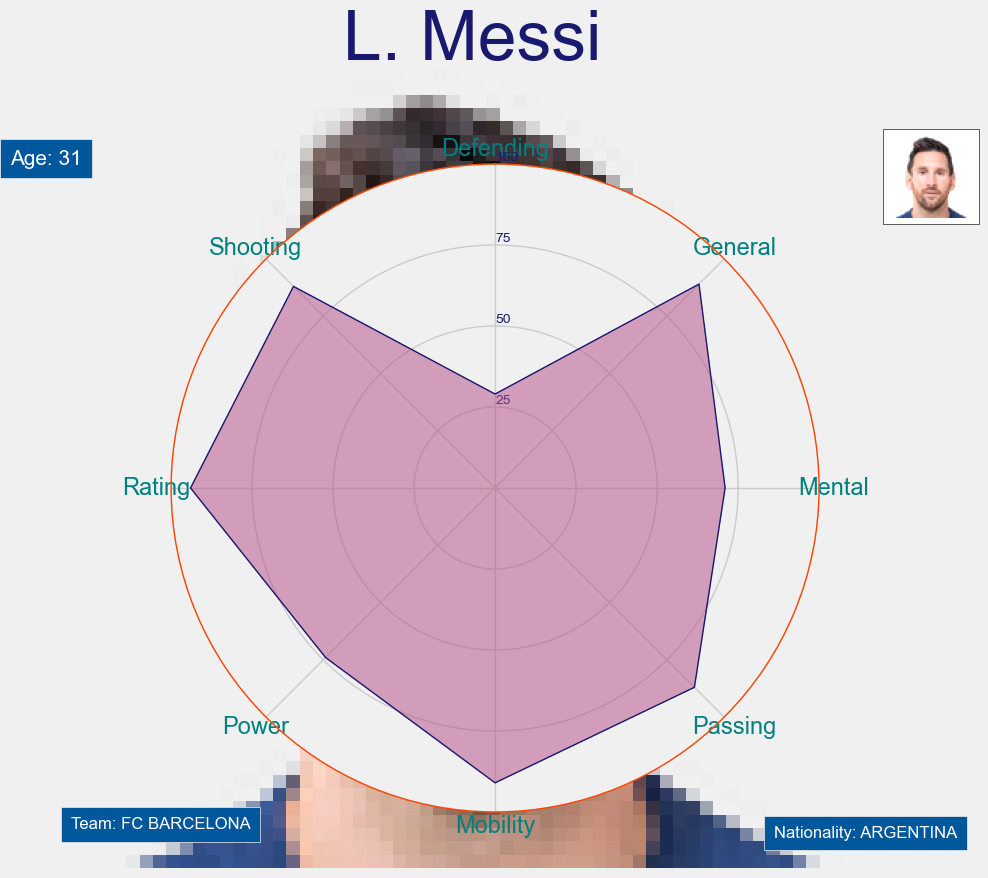

In [1654]:
graphPolar(0)


In [1655]:
graphPolar(900000)

The base has 17917 players. You can put positive numbers from 0 to 17917
12


8
11


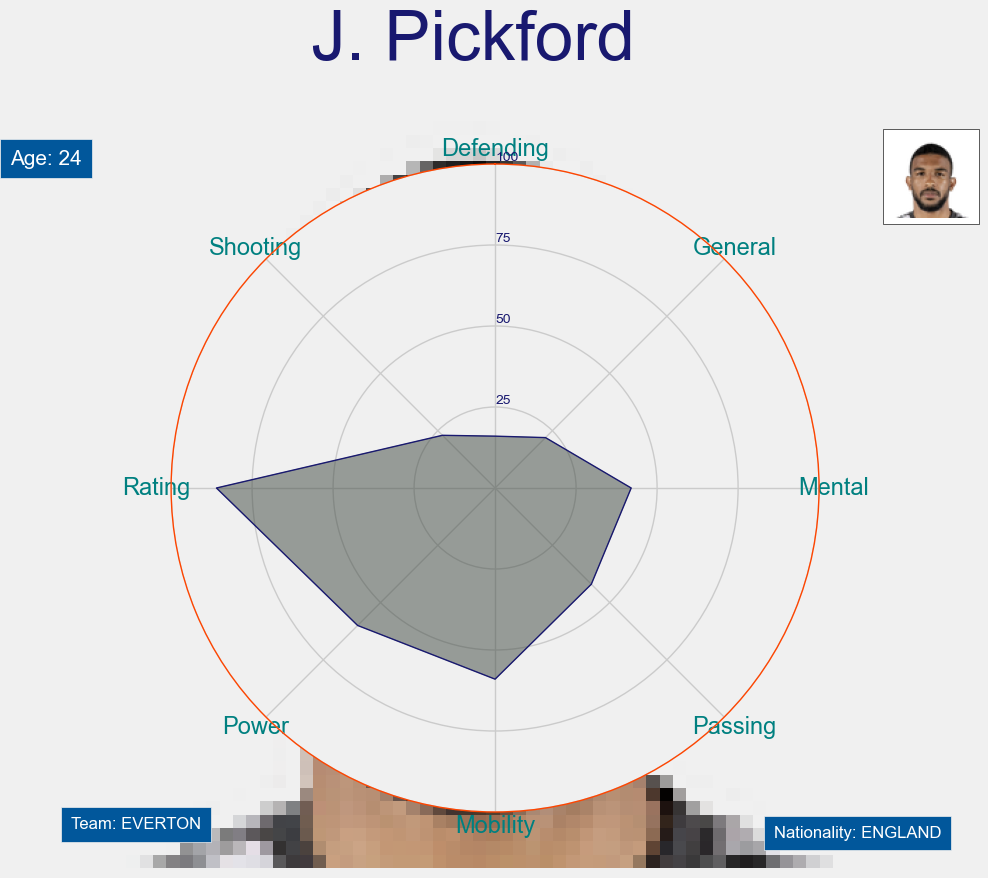

In [1656]:
graphPolar(180)

8
11


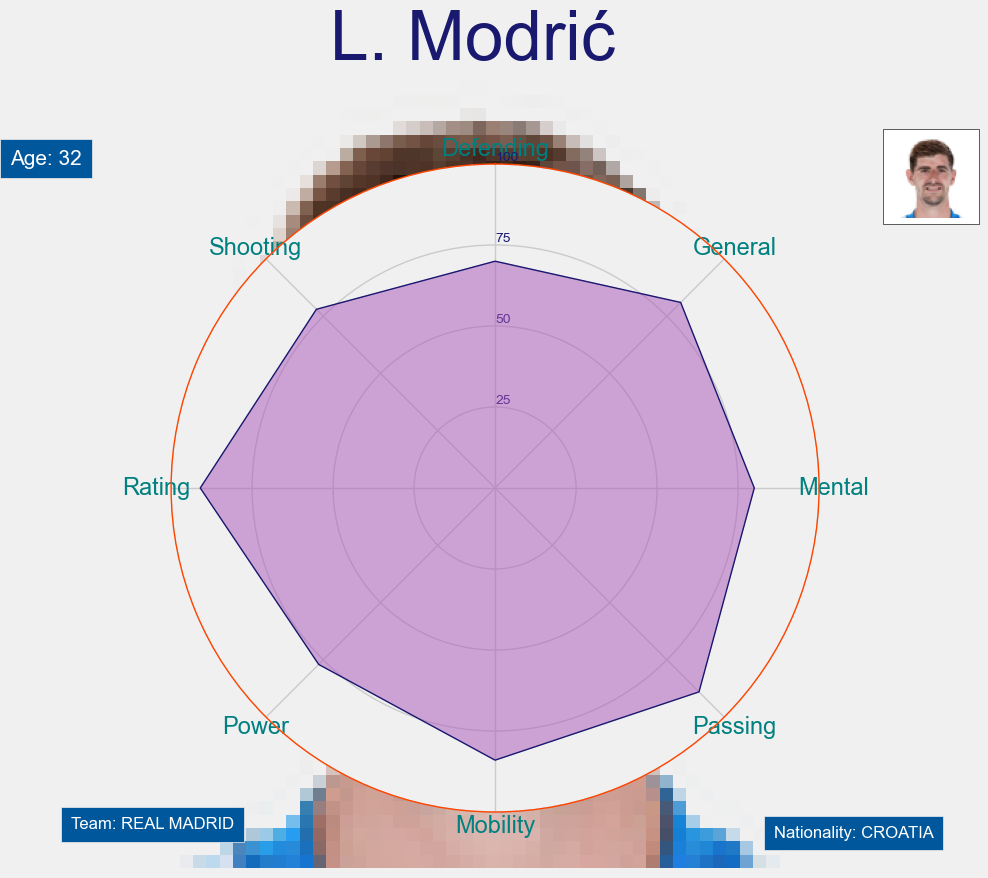

In [1657]:
graphPolar(6)

Text(0.5, 1.0, 'Most Preferred Foot of the Players')

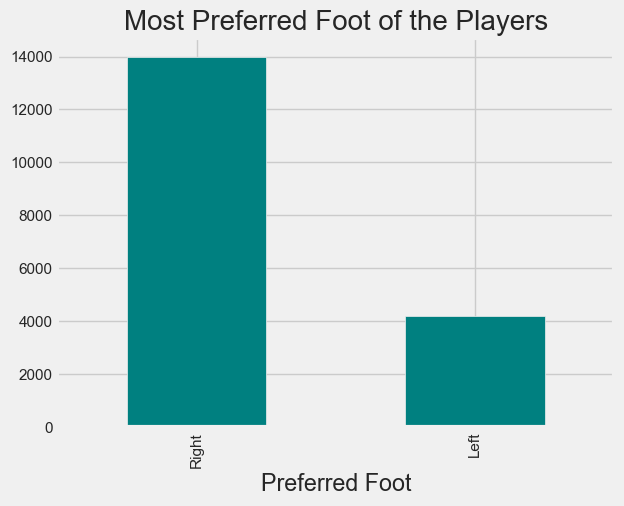

In [1658]:
# comparison of preferred foot over the different players
data.head(2)
data["Preferred Foot"].value_counts(dropna=False)
data["Preferred Foot"].value_counts().head(1000).plot.bar(color="teal")
plt.title("Most Preferred Foot of the Players",fontsize=20)

International Reputation
1.0    16580
2.0     1261
3.0      309
4.0       51
5.0        6
Name: count, dtype: int64


<BarContainer object of 5 artists>

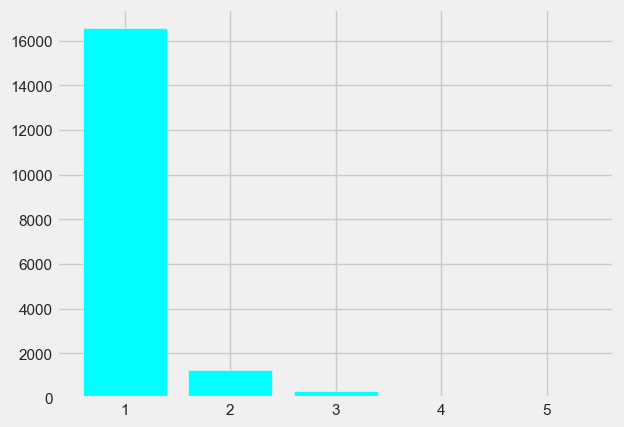

In [1659]:
#  comparison of international reputation among the players
print(data["International Reputation"].value_counts())
val = data["International Reputation"].value_counts()
plt.bar(val.index , val.values , color="cyan")

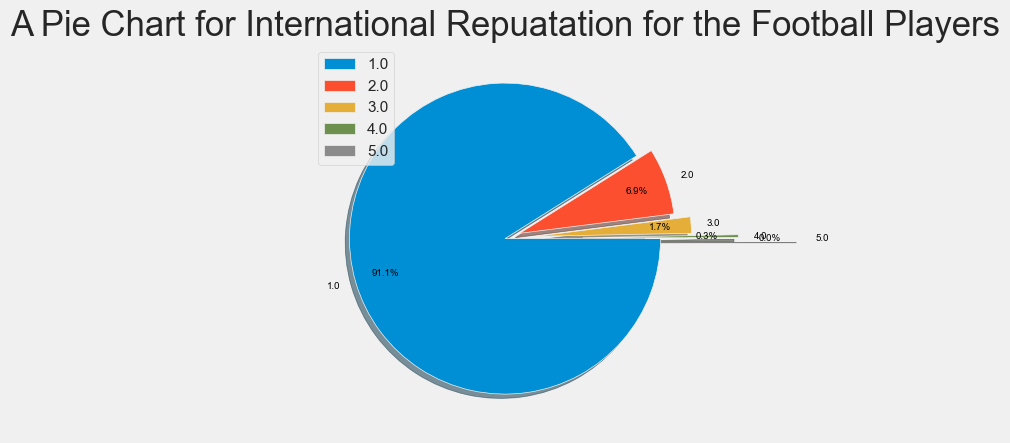

In [1660]:
# plotting a pie chart to represent share of international repuatation
size = [data["International Reputation"].value_counts()[1.0],
        data["International Reputation"].value_counts()[2.0],
        data["International Reputation"].value_counts()[3.0],
        data["International Reputation"].value_counts()[4.0],
        data["International Reputation"].value_counts()[5.0]
]
exp = [0, 0.1 , 0.2 , 0.5 , 0.9]
label = ["1.0","2.0","3.0","4.0","5.0"]
colors = ['red', 'yellow', 'green', 'pink', 'blue']
plt.pie(size , labels = label, explode = exp, shadow=True, frame=False, radius=1.0,  startangle=0, pctdistance=0.8
       , counterclock=False,autopct="%0.1f%%", textprops={'color': 'black', 'fontsize': 7})
plt.title('A Pie Chart for International Repuatation for the Football Players', fontsize = 25)
plt.legend()
plt.show()

In [1661]:
# A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 
# which specifies the shot power and ball control for the other foot of that player than his preferred foot's.The higher
# rate defines the higher shot power and ball control.

data["Weak Foot"].value_counts(dropna=False)

Weak Foot
3.0    11397
2.0     3761
4.0     2662
5.0      229
1.0      158
Name: count, dtype: int64

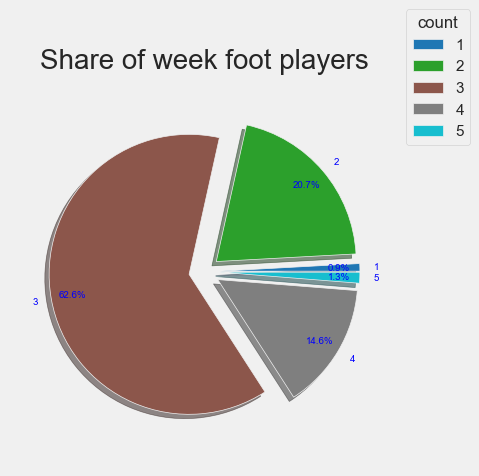

In [1662]:
# plotting a pie chart to represent the share of week foot players
sizes = [ data["Weak Foot"].value_counts()[1.0],
          data["Weak Foot"].value_counts()[2.0],
         data["Weak Foot"].value_counts()[3.0],
         data["Weak Foot"].value_counts()[4.0],
         data["Weak Foot"].value_counts()[5.0]
]
label = ["1","2","3","4","5"]
color = plt.cm.tab10(np.linspace(0,1,len(sizes)))
exp = [0.1,0.1,0.1,0.1,0.1]

plt.pie(sizes, labels=label, colors=color, explode=exp, shadow=True, autopct="%0.1f%%", radius= 0.9, counterclock=True, pctdistance=0.85
       , textprops={"color":"blue" , "fontsize":7})
plt.title("Share of week foot players",fontsize=20)
plt.legend(label, loc='center left', bbox_to_anchor=(1,1), title="count")
plt.show()

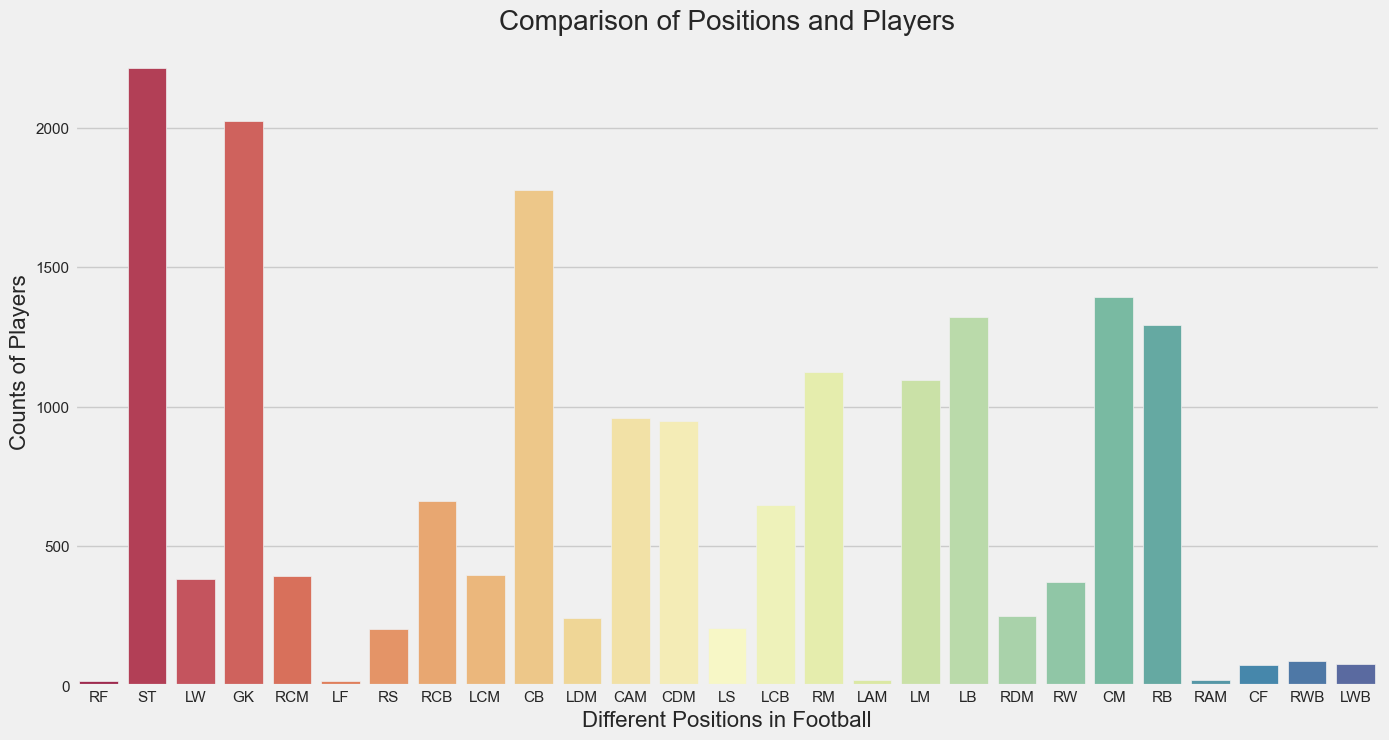

In [1663]:
# different positions acquired by the players 
data["Position"].unique()
import seaborn as sns
plt.figure(figsize=(15,8))
bp = sns.countplot(x="Position" , data=data, hue="Position",  palette="Spectral", legend=False)
bp.set_xlabel("Different Positions in Football",fontsize=16)
bp.set_ylabel("Counts of Players",fontsize=16)
bp.set_title("Comparison of Positions and Players",fontsize=20)
plt.show()

In [1664]:
# defining a function for cleaning the Weight data
data["Weight"] = data["Weight"].apply(lambda x : float(str(x).replace("lbs","")))
data["Weight"].head()

0    159.0
1    183.0
2    150.0
3    168.0
4    154.0
Name: Weight, dtype: float64

In [1665]:
# defining a function for cleaning the wage column
def extract_extra_out(value):
    out = value.replace("€", "")
    if "K" in out:
        out = float(out.replace("K" , "")) * 1000
    return out

data["Wage"] = data["Wage"].apply(lambda x : extract_extra_out(x))
data["Wage"].head()

0    565000.0
1    405000.0
2    290000.0
3    260000.0
4    355000.0
Name: Wage, dtype: object

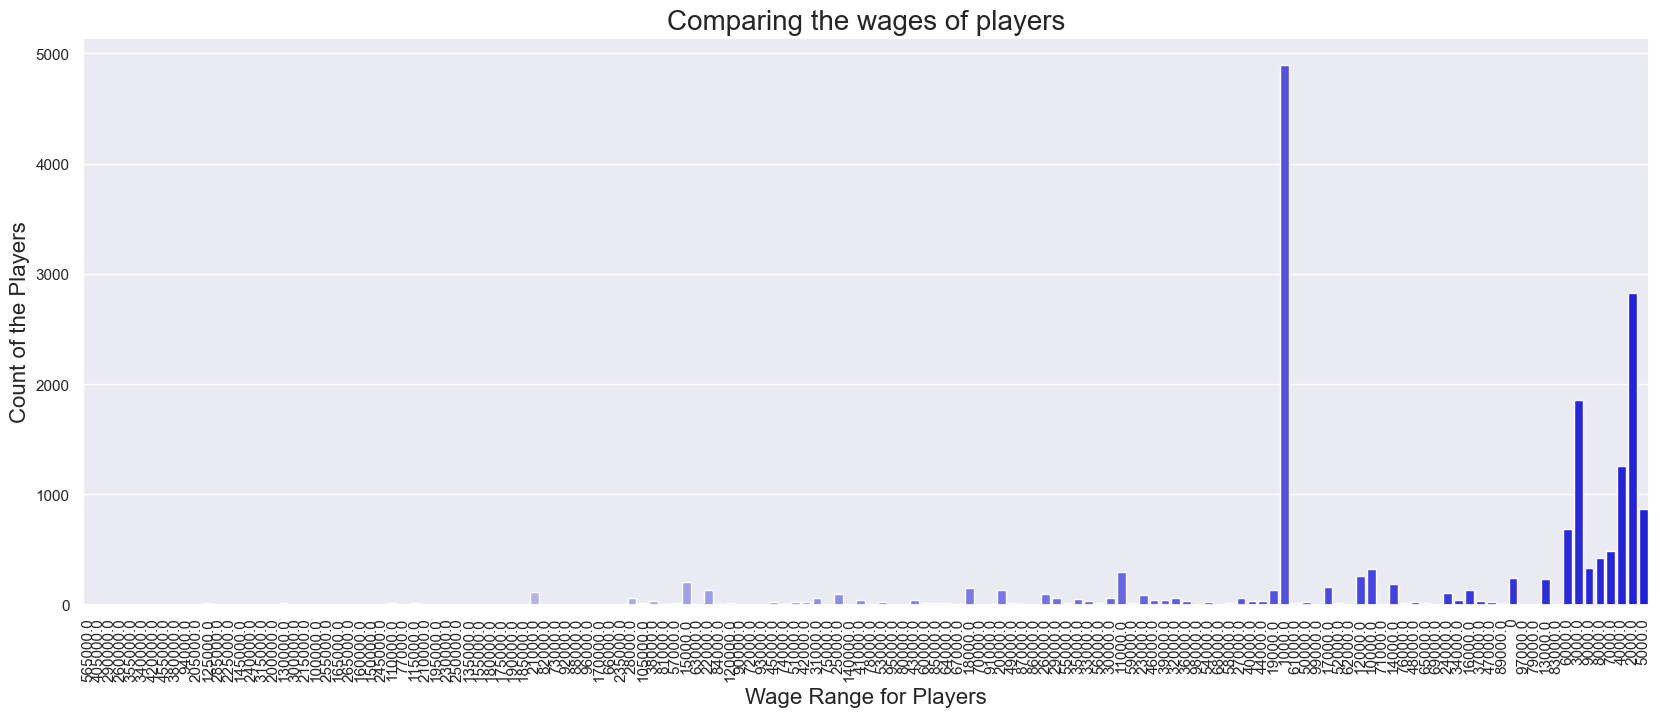

In [1666]:
# Comparing the players' Wages
sns.set(style="darkgrid", palette="muted")
plt.figure(figsize=(18,7))
sns.countplot(x="Wage" , data=data, hue = "Wage" , legend=False, palette="light:blue")
plt.xlabel('Wage Range for Players', fontsize = 16)
plt.ylabel('Count of the Players', fontsize = 16)
plt.title('Comparing the wages of players', fontsize = 20)
plt.xticks(rotation=90)
plt.show()

Skill Moves
2.0    8613
3.0    6600
1.0    2026
4.0     917
5.0      51
Name: count, dtype: int64


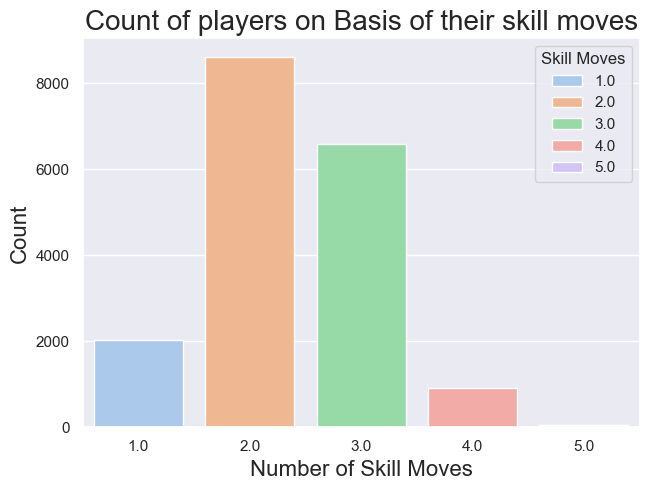

In [1689]:
# Skill Moves of Players
print(data["Skill Moves"].value_counts(dropna=False))
sns.countplot(x="Skill Moves" , data=data, hue="Skill Moves", legend=True, palette="pastel")
plt.title(label="Count of players on Basis of their skill moves",fontsize=20)
plt.xlabel(xlabel="Number of Skill Moves",fontsize=16)
plt.ylabel(ylabel="Count",fontsize=16)
plt.show()

Height
6'0     2881
5'10    2479
5'9     2238
5'11    2207
6'2     2015
6'1     1908
6'3      990
5'8      946
5'7      905
6'4      749
5'6      316
6'5      246
5'5      145
6'6       93
5'4       30
6'7       21
5'3       18
6'8       10
5'2        5
5'1        3
6'9        2
Name: count, dtype: int64


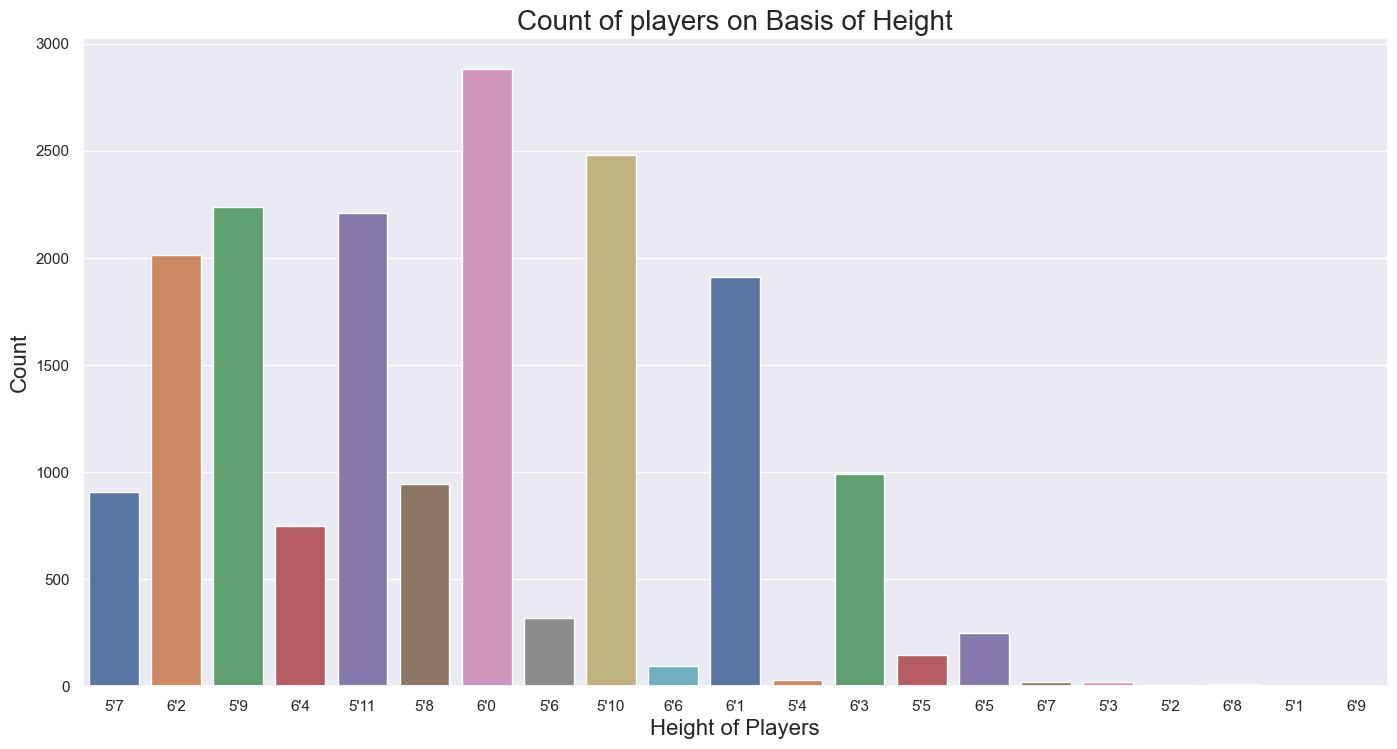

In [1695]:
# Height of Players
print(data["Height"].value_counts(dropna=False))
plt.figure(figsize=(15,8))
sns.countplot(x="Height", data=data, legend=False, hue="Height", palette="deep")
plt.title(label="Count of players on Basis of Height",fontsize=20)
plt.xlabel(xlabel="Height of Players",fontsize=16)
plt.ylabel(ylabel="Count",fontsize=16)
plt.show()

False


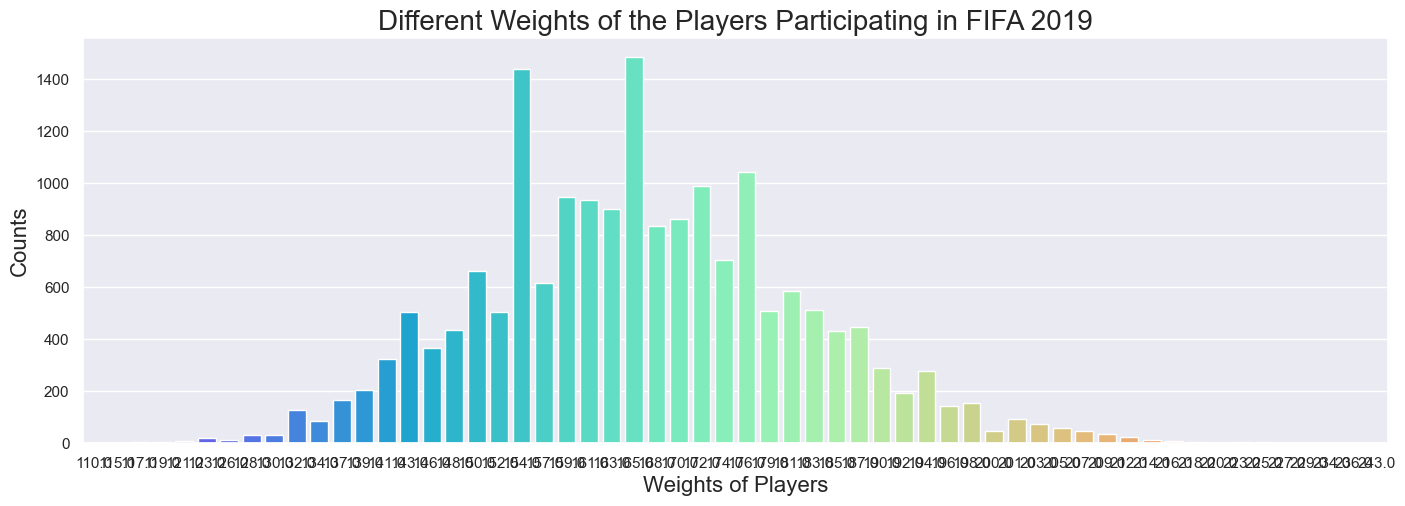

In [1707]:
# To show Different body weight of the players participating in the FIFA 2019
print(data.Weight.isna().any())
plt.figure(figsize=(15,5))
sns.countplot(x="Weight", data=data, hue="Weight", legend=False, palette="rainbow")
plt.title("Different Weights of the Players Participating in FIFA 2019",fontsize=20)
plt.xlabel(xlabel="Weights of Players",fontsize=16)
plt.ylabel(ylabel="Counts",fontsize=16)
plt.show()

Work Rate
Medium/ Medium    9858
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: count, dtype: int64


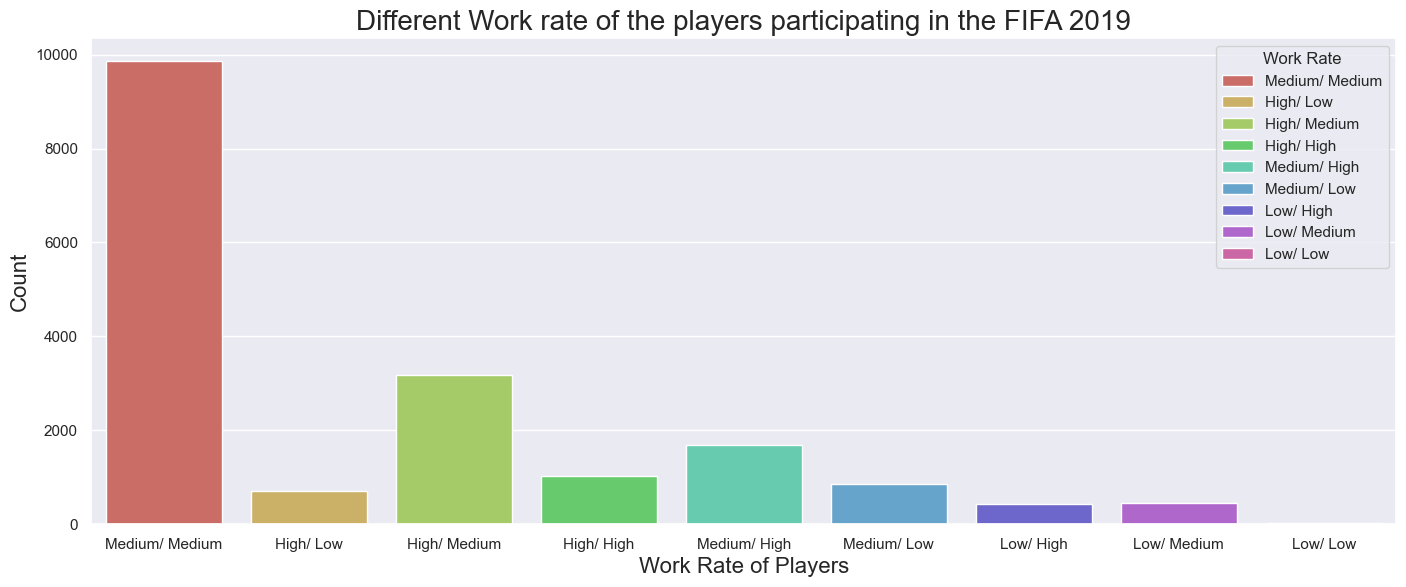

In [1711]:
# To show Different Work rate of the players participating in the FIFA 2019
print(data["Work Rate"].value_counts(dropna=False))
plt.figure(figsize=(15,6))
sns.countplot(x="Work Rate", data=data, hue="Work Rate", legend=True, palette="hls")
plt.title(label="Different Work rate of the players participating in the FIFA 2019",fontsize=20)
plt.xlabel("Work Rate of Players",fontsize=16)
plt.ylabel("Count",fontsize=16)
plt.show()

False
731 2346 1597.8099082770364


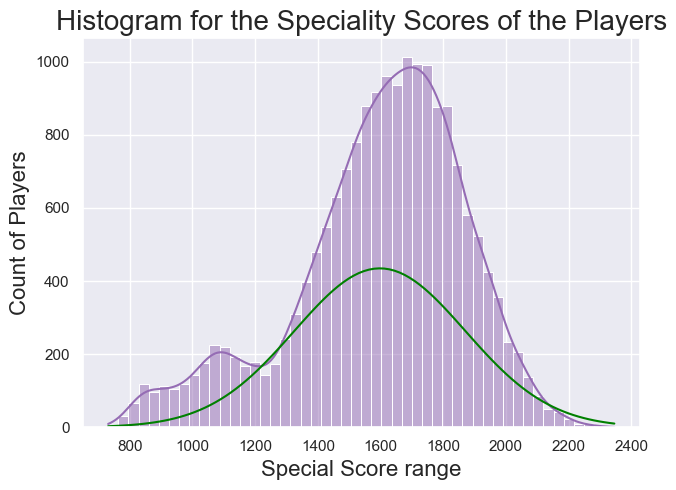

In [1774]:
# To show Different Speciality Score of the players participating in the FIFA 2019
print(data["Special"].isna().any())
print(data.Special.min() , data.Special.max() , data.Special.mean())
sns.histplot(x=data.Special , bins=50, kde=True, color="m", stat="count")

from scipy.stats import norm
mu = data["Special"].mean()
sigma = data.Special.std()
x_value = np.linspace(data["Special"].min() , data["Special"].max() , 100)
y_value = norm.pdf(x_value , mu , sigma)
y_value_scaled = y_value * len(data["Special"]) * (x_value[1]-x_value[0])
sns.lineplot(x=x_value,
            y=y_value_scaled,
            color = "green")
plt.title(label="Histogram for the Speciality Scores of the Players",fontsize=20)
plt.xlabel(xlabel="Special Score range",fontsize=16)
plt.ylabel(ylabel="Count of Players",fontsize=16)
plt.show()


False


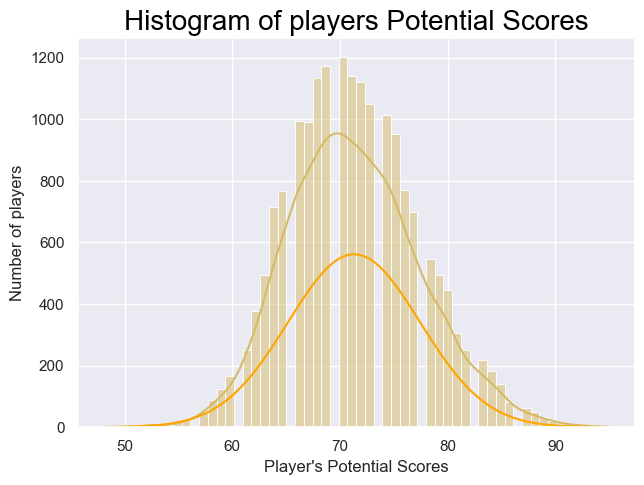

In [1800]:
# To show Different potential scores of the players participating in the FIFA 2019
print(data.Potential.isna().any())
ax = sns.histplot(data.Potential , kde=True, bins=58, color="y")

x_value = np.linspace(data.Potential.min() , data.Potential.max() , 100)
mu = data.Potential.mean()
sigma = data.Potential.std()
y_value = norm.pdf(x_value , mu , sigma)
y_value_scaled = y_value * len(data.Potential) * (x_value[1]-x_value[0])
ax = sns.lineplot(x=x_value , y=y_value_scaled , color = "orange")

ax.set_title(label="Histogram of players Potential Scores",fontsize=20,color="black")
ax.set_xlabel(xlabel="Player\'s Potential Scores",fontsize=12)
ax.set_ylabel(ylabel="Number of players",fontsize=12)
plt.show()

False


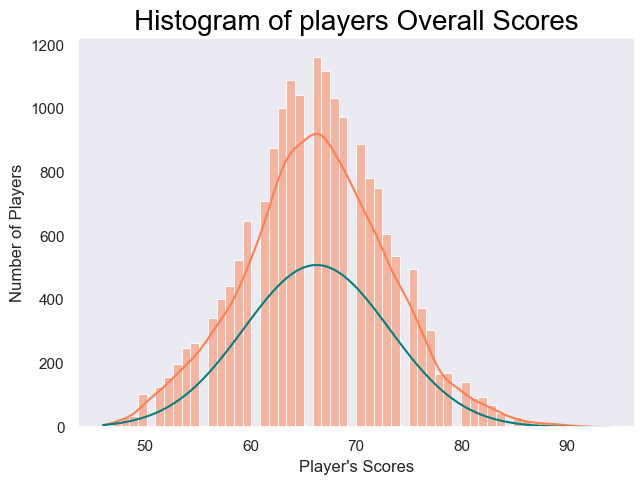

In [1882]:
# To show Different overall scores of the players participating in the FIFA 2019
print(data.Overall.isna().any())
sns.set(style = "dark", palette = "dark", color_codes = False)
lx = sns.histplot(data["Overall"] , kde=True , bins=58 , color="coral")

x_value = np.linspace(data.Overall.min() , data.Overall.max() , 100)
mu = data["Overall"].mean()
sigma = data["Overall"].std()
y_value = norm.pdf(x_value , mu , sigma)
y_value_scaled = y_value * len(data["Overall"]) * (x_value[1] - x_value[0])
lx = sns.lineplot(x=x_value , y=y_value_scaled , color="teal")
lx.set_title(label="Histogram of players Overall Scores",fontsize=20,color="black")
lx.set_xlabel(xlabel="Player\'s Scores",fontsize=12)
lx.set_ylabel(ylabel="Number of Players",fontsize=12)
plt.show()

False


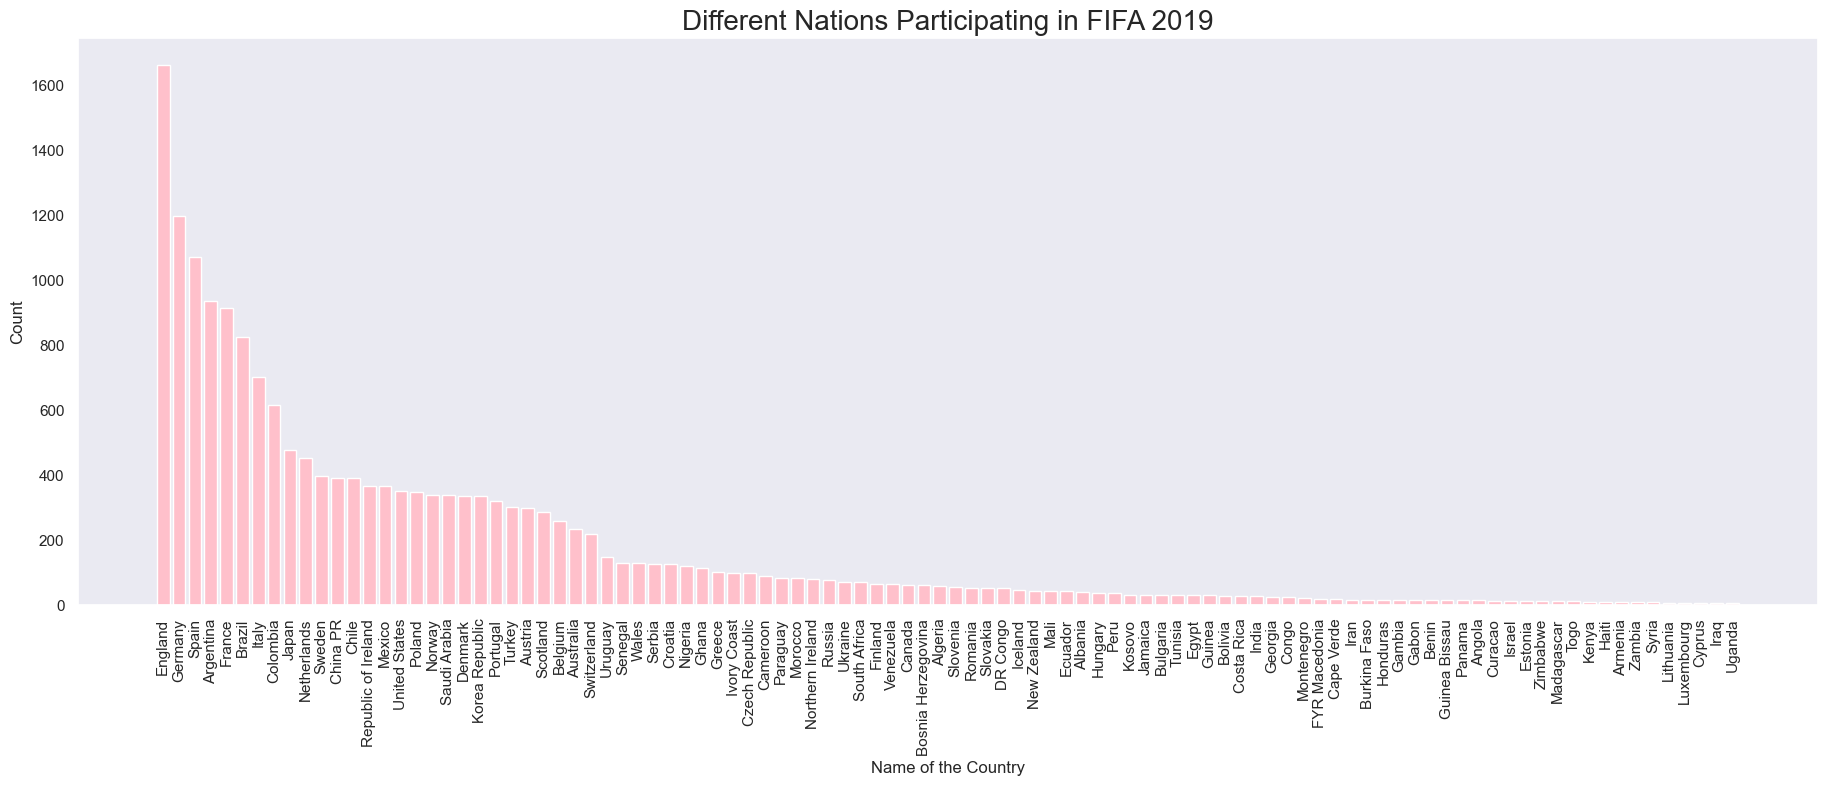

In [1884]:
# To show Different nations participating in the FIFA 2019
plt.figure(figsize=(20,7))
print(data["Nationality"].isna().any())
val = data["Nationality"].value_counts().head(100)
plt.bar(val.index , val.values , color = "pink")
plt.title(label="Different Nations Participating in FIFA 2019",fontsize=20)
plt.xlabel(xlabel="Name of the Country",fontsize=12)
plt.ylabel(ylabel="Count",fontsize=12)
plt.xticks(rotation=90)
plt.show()

False


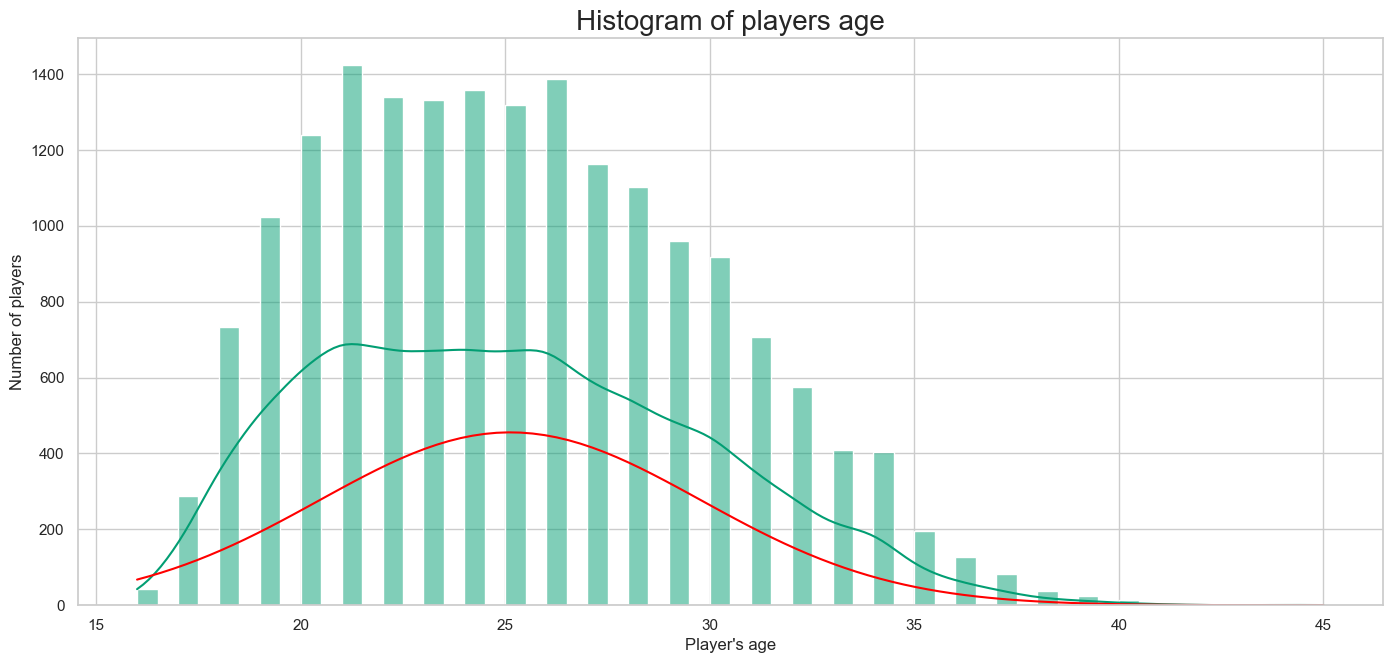

In [1888]:
# To show that there are people having same age
# Histogram: number of players's age
print(data.Age.isna().any())
plt.figure(figsize=(15,7))
kx = sns.set(style="whitegrid" , palette="colorblind" , color_codes=True)
kx = sns.histplot(data.Age , kde=True , bins=58 , color="g")

x_value = np.linspace(data["Age"].min() , data.Age.max() , 100)
mu = data["Age"].mean()
sigma = data.Age.std()
y_value = norm.pdf(x_value , mu , sigma)
y_value_scaled = y_value * len(data.Age) * (x_value[1] - x_value[0])
kx = sns.lineplot(x=x_value , y=y_value_scaled , color = "red")
kx.set_xlabel(xlabel = "Player\'s age", fontsize = 12)
kx.set_ylabel(ylabel = 'Number of players', fontsize = 12)
kx.set_title(label = 'Histogram of players age', fontsize = 20)
plt.show()

0


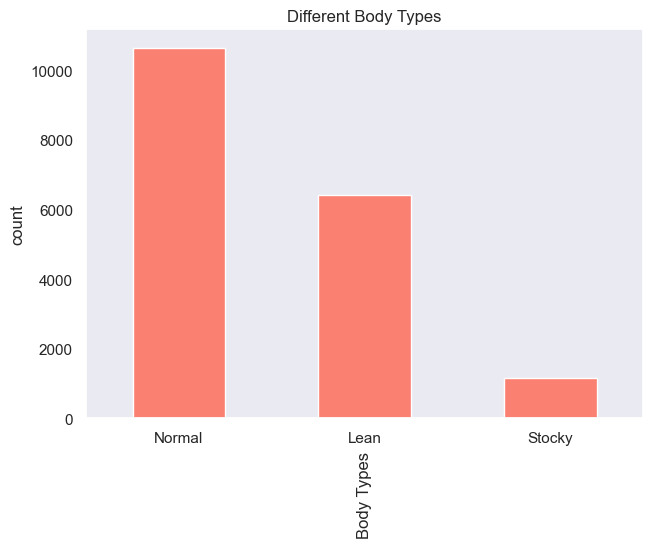

In [1928]:
#comparing the different body types of the players participating in FIFA 2019
print(data["Body Type"].isna().sum())
sns.set(style="dark" , palette="deep")
data["Body Type"].value_counts().plot.bar(color = "salmon")
plt.title('Different Body Types')
plt.xlabel('Body Types' , rotation=90)
plt.ylabel('count',rotation=90)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

In [1944]:
# selecting some of the interesting and important columns from the set of columns in the given dataset

selected_columns = ['Name', 'Age', 'Nationality', 'Overall', 'Potential', 'Club', 'Value',
                    'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Height', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause']

data_selected = pd.DataFrame(data , columns = selected_columns)
data_selected.columns


9


Text(0.5, 1.0, 'Comparison of Overall Scores and age wrt Preferred foot')

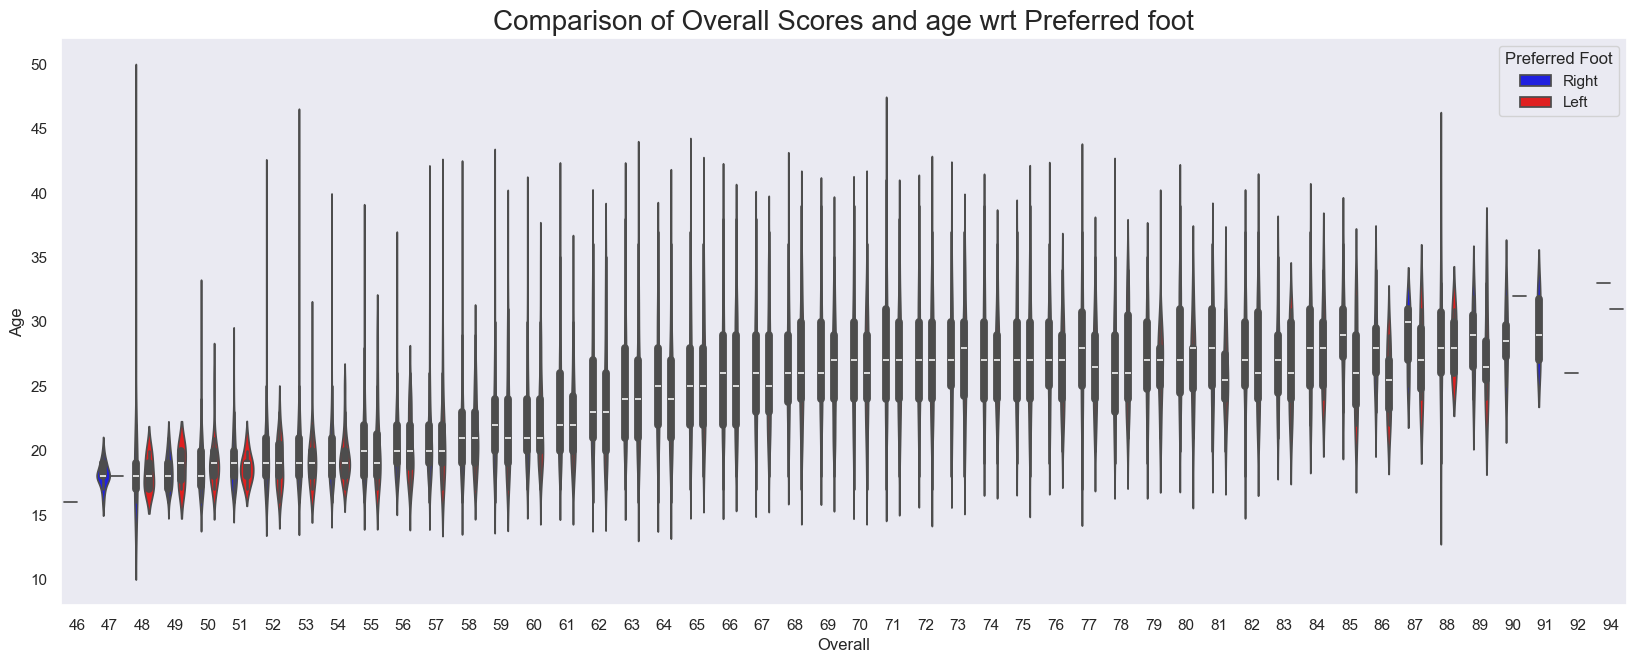

In [1982]:
#violin plot
plt.figure(figsize=((18, 7)))
hue_colors = {"Left": "red", "Right": "blue"}
sns.violinplot(x="Overall" , y="Age" , data=data , hue = "Preferred Foot" , palette=hue_colors)
plt.title(title='Violin Plot : Comparison of Overall Scores and age wrt Preferred foot', fontsize = 20)

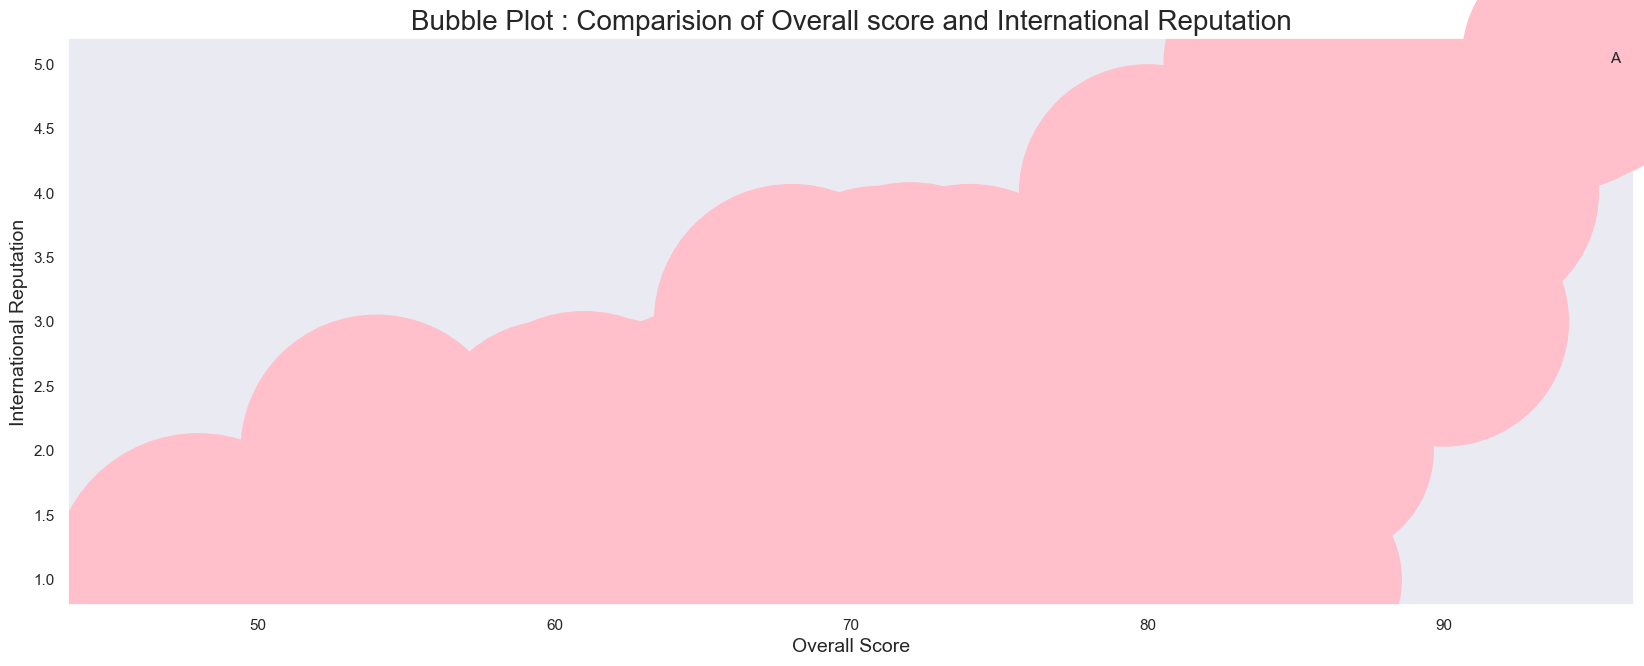

In [2025]:
#bubble plot 
plt.figure(figsize=(18,7))
plt.scatter(x=data["Overall"] , y=data["International Reputation"] , s = data["Age"]*1000 , color="pink" ) 
plt.title(label="Bubble Plot : Comparision of Overall score and International Reputation",fontsize=20) 
plt.xlabel(xlabel="Overall Score",fontsize=14) 
plt.ylabel(ylabel="International Reputation",fontsize=14) 
plt.legend("Age" , loc="upper right") 
plt.show()

In [2039]:
data_selected.head()

Name  Age Nationality  Overall  Potential  \
0           L. Messi   31   Argentina       94         94   
1  Cristiano Ronaldo   33    Portugal       94         94   
2          Neymar Jr   26      Brazil       92         93   
3             De Gea   27       Spain       91         93   
4       K. De Bruyne   27     Belgium       91         92   

                  Club    Value      Wage  Special Preferred Foot  \
0         FC Barcelona  €110.5M  565000.0     2202           Left   
1             Juventus     €77M  405000.0     2228          Right   
2  Paris Saint-Germain  €118.5M  290000.0     2143          Right   
3    Manchester United     €72M  260000.0     1471          Right   
4      Manchester City    €102M  355000.0     2281          Right   

   International Reputation  Weak Foot  Skill Moves       Work Rate Body Type  \
0                       5.0        4.0          4.0  Medium/ Medium    Stocky   
1                       5.0        4.0          5.0       High/ Low    Stocky   
2                       5.0        5.0          5.0    High/ Medium    Stocky   
3                       4.0        3.0          1.0  Medium/ Medium      Lean   
4                       4.0        5.0          4.0      High/ High    Normal   

  Position Height  Weight  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
0       RF    5'7   159.0       95.0             70.0          90.0     86.0   
1       ST    6'2   183.0       94.0             89.0          81.0     87.0   
2       LW    5'9   150.0       87.0             62.0          84.0     84.0   
3       GK    6'4   168.0       13.0             21.0          50.0     13.0   
4      RCM   5'11   154.0       82.0             55.0          92.0     82.0   

   Dribbling  Curve  FKAccuracy  LongPassing  BallControl  Acceleration  \
0       97.0   93.0        94.0         87.0         96.0          91.0   
1       88.0   81.0        76.0         77.0         94.0          89.0   
2       96.0   88.0        87.0         78.0         95.0          94.0   
3       18.0   21.0        19.0         51.0         42.0          57.0   
4       86.0   85.0        83.0         91.0         91.0          78.0   

   SprintSpeed  Agility  Reactions  Balance  ShotPower  Jumping  Stamina  \
0         86.0     91.0       95.0     95.0       85.0     68.0     72.0   
1         91.0     87.0       96.0     70.0       95.0     95.0     88.0   
2         90.0     96.0       94.0     84.0       80.0     61.0     81.0   
3         58.0     60.0       90.0     43.0       31.0     67.0     43.0   
4         76.0     79.0       91.0     77.0       91.0     63.0     90.0   

   Strength  LongShots  Aggression  Interceptions  Positioning  Vision  \
0      59.0       94.0        48.0           22.0         94.0    94.0   
1      79.0       93.0        63.0           29.0         95.0    82.0   
2      49.0       82.0        56.0           36.0         89.0    87.0   
3      64.0       12.0        38.0           30.0         12.0    68.0   
4      75.0       91.0        76.0           61.0         87.0    94.0   

   Penalties  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
0       75.0       96.0     33.0            28.0           26.0       6.0   
1       85.0       95.0     28.0            31.0           23.0       7.0   
2       81.0       94.0     27.0            24.0           33.0       9.0   
3       40.0       68.0     15.0            21.0           13.0      90.0   
4       79.0       88.0     68.0            58.0           51.0      15.0   

   GKHandling  GKKicking  GKPositioning  GKReflexes Release Clause  
0        11.0       15.0           14.0         8.0        €226.5M  
1        11.0       15.0           14.0        11.0        €127.1M  
2         9.0       15.0           15.0        11.0        €228.1M  
3        85.0       87.0           88.0        94.0        €138.6M  
4        13.0        5.0           10.0        13.0        €196.4M

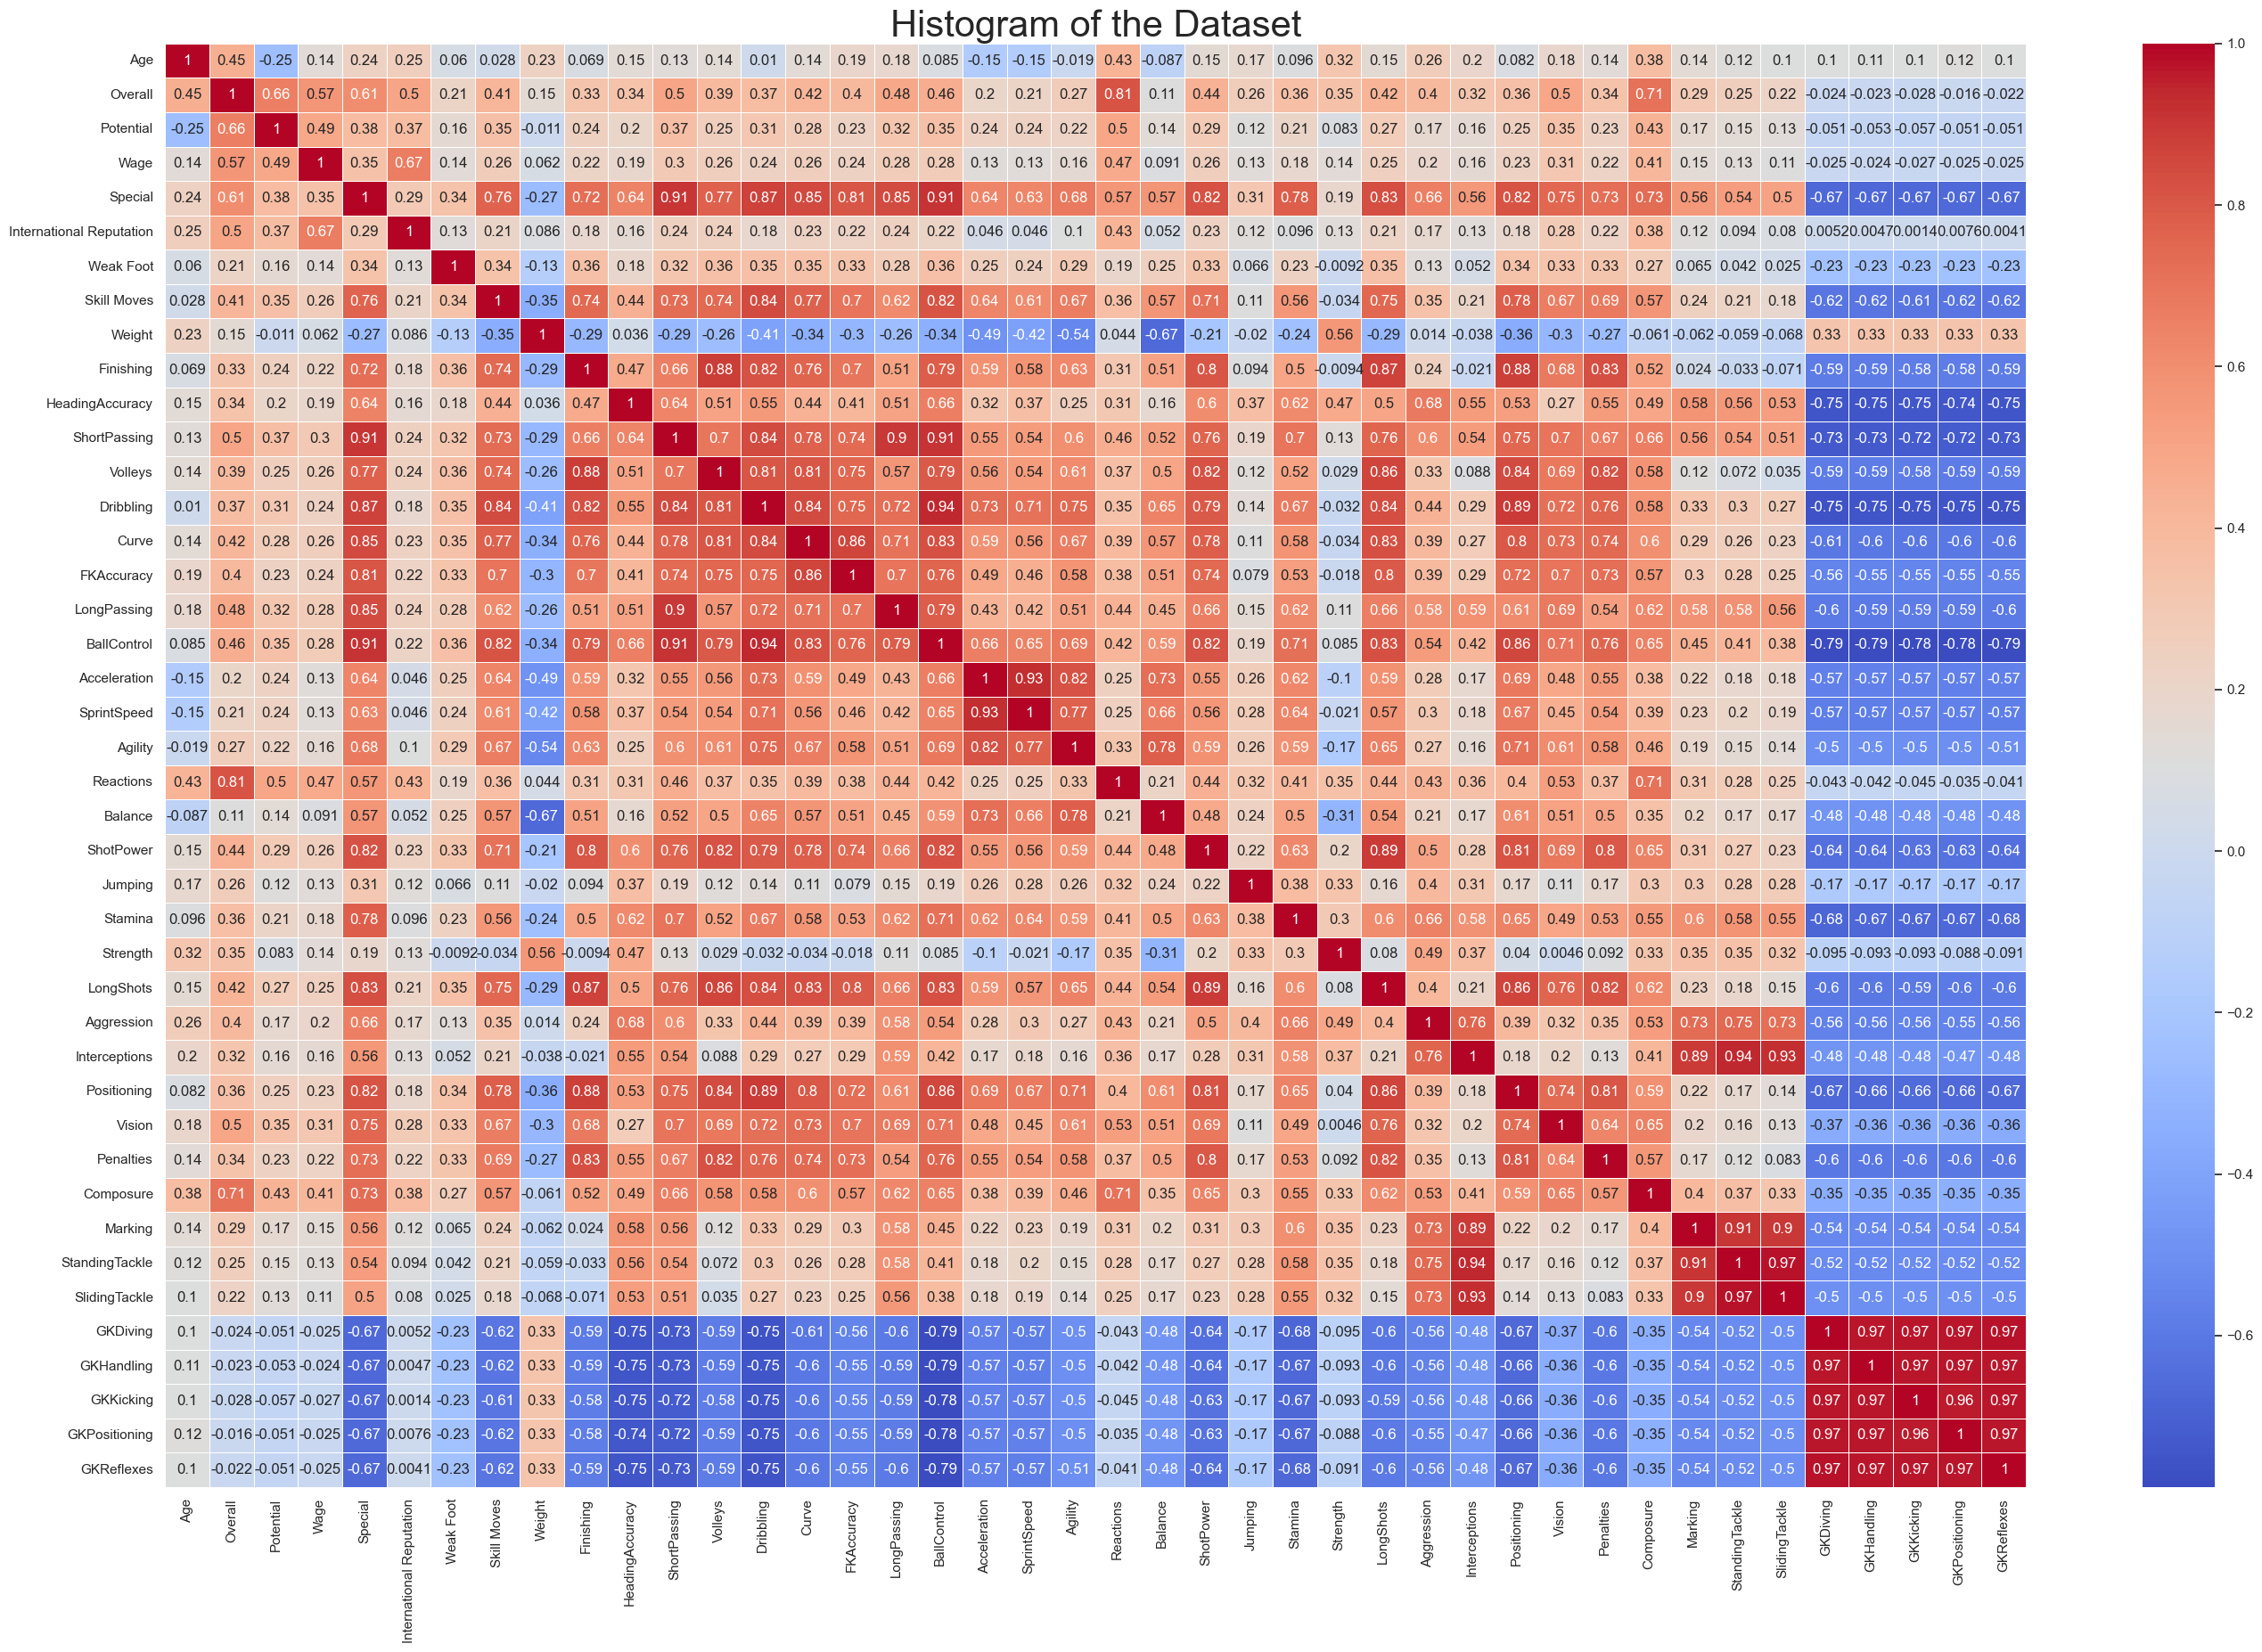

In [2061]:
#heatmap to find out correlation 

plt.figure(figsize=(30,20))

sns.heatmap(data[['Age','Overall', 'Potential',
                    'Wage', 'Special', 'International Reputation', 'Weak Foot',
                    'Skill Moves', 'Weight',
                    'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
                    'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
                    'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
                    'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
                    'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
                    'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                    'GKKicking', 'GKPositioning', 'GKReflexes']].corr() ,
            annot=True,
           cmap = "coolwarm",
           linewidths=0.5)
plt.title("Histogram of the Dataset",fontsize=30)
plt.show()

In [2073]:
# best players per each position with their age, club, and nationality based on their overall scores
#extract the best player for each position based on their Overall score and then display relevant details 
#such as the player's position, name, age, club, and nationality.

data.iloc[data.groupby(data["Position"])["Overall"].idxmax()][["Position" , "Name" , "Age" , "Club" , "Nationality" , "Overall"]]

Position               Name  Age                      Club Nationality  \
17       CAM       A. Griezmann   27           Atlético Madrid      France   
12        CB           D. Godín   32           Atlético Madrid     Uruguay   
20       CDM    Sergio Busquets   29              FC Barcelona       Spain   
271       CF       Luis Alberto   25                     Lazio       Spain   
67        CM             Thiago   27         FC Bayern München       Spain   
3         GK             De Gea   27         Manchester United       Spain   
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia   
35        LB            Marcelo   30               Real Madrid      Brazil   
24       LCB       G. Chiellini   33                  Juventus       Italy   
11       LCM           T. Kroos   28               Real Madrid     Germany   
14       LDM           N. Kanté   27                   Chelsea      France   
5         LF          E. Hazard   27                   Chelsea     Belgium   
33        LM      P. Aubameyang   29                   Arsenal       Gabon   
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay   
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil   
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany   
129      RAM        J. Cuadrado   30                  Juventus    Colombia   
69        RB        Azpilicueta   28                   Chelsea       Spain   
8        RCB       Sergio Ramos   32               Real Madrid       Spain   
4        RCM       K. De Bruyne   27           Manchester City     Belgium   
45       RDM           P. Pogba   25         Manchester United      France   
0         RF           L. Messi   31              FC Barcelona   Argentina   
25        RM          K. Mbappé   19       Paris Saint-Germain      France   
7         RS          L. Suárez   31              FC Barcelona     Uruguay   
56        RW     Bernardo Silva   23           Manchester City    Portugal   
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany   
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal   

     Overall  
17        89  
12        90  
20        89  
271       82  
67        86  
3         91  
28        88  
35        88  
24        89  
11        90  
14        89  
5         91  
33        88  
21        89  
2         92  
474       80  
129       84  
69        86  
8         91  
4         91  
45        87  
0         94  
25        88  
7         91  
56        86  
450       80  
1         94

In [2093]:
# best players from each positions with their age, nationality, club based on their potential scores

data.iloc[data.groupby(data["Position"])["Potential"].idxmax()][["Name" , "Age" , "Nationality" , "Club" , "Potential"]]

Name  Age Nationality                     Club  Potential
31            C. Eriksen   26     Denmark        Tottenham Hotspur         91
42             S. Umtiti   24      France             FC Barcelona         92
27              Casemiro   26      Brazil              Real Madrid         90
350             A. Milik   24      Poland                   Napoli         88
78   S. Milinković-Savić   23      Serbia                    Lazio         90
3                 De Gea   27       Spain        Manchester United         93
28          J. Rodríguez   26    Colombia        FC Bayern München         89
35               Marcelo   30      Brazil              Real Madrid         88
77           M. Škriniar   23    Slovakia                    Inter         92
11              T. Kroos   28     Germany              Real Madrid         90
14              N. Kanté   27      France                  Chelsea         90
15             P. Dybala   24   Argentina                 Juventus         94
415             H. Aouar   20      France       Olympique Lyonnais         90
21             E. Cavani   31     Uruguay      Paris Saint-Germain         89
2              Neymar Jr   26      Brazil      Paris Saint-Germain         93
601                Jonny   24       Spain  Wolverhampton Wanderers         83
171            H. Ziyech   25     Morocco                     Ajax         86
247         João Cancelo   24    Portugal                 Juventus         88
8           Sergio Ramos   32       Spain              Real Madrid         91
4           K. De Bruyne   27     Belgium          Manchester City         92
45              P. Pogba   25      France        Manchester United         91
0               L. Messi   31   Argentina             FC Barcelona         94
25             K. Mbappé   19      France      Paris Saint-Germain         95
7              L. Suárez   31     Uruguay             FC Barcelona         91
79         Marco Asensio   22       Spain              Real Madrid         92
766         Pablo Maffeo   20       Spain            VfB Stuttgart         86
1      Cristiano Ronaldo   33    Portugal                 Juventus         94

In [2097]:
# picking up the countries with highest number of players to compare their overall scores
data["Nationality"].value_counts().head(10)

Nationality
England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: count, dtype: int64

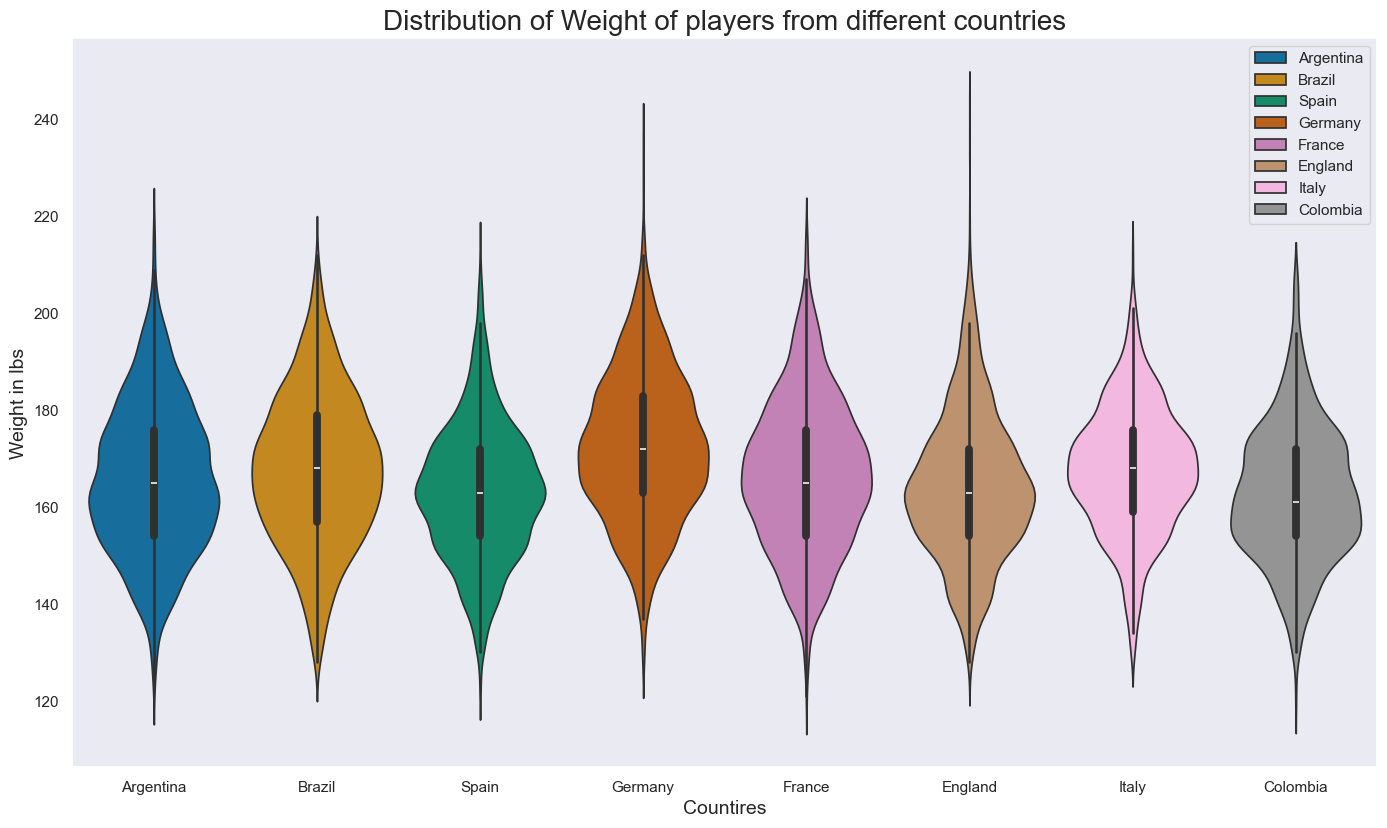

In [2107]:
# Every Nations' Player and their Weights
top_countries = ["England" , "Germany" , "Spain" , "Argentina" , "France" , "Brazil" , "Italy" , "Colombia"]
selected_nations = data.loc[data["Nationality"].isin(top_countries) & data["Weight"]]

plt.figure(figsize=(15,9))
gx = sns.violinplot(x=selected_nations["Nationality"] , y=selected_nations["Weight"] , palette="colorblind" , 
                    hue=selected_nations["Nationality"], legend=True)
gx.set_title(label="Distribution of Weight of players from different countries",fontsize=20)
gx.set_xlabel("Countires" , fontsize=14)
gx.set_ylabel("Weight in lbs" , fontsize=14)
gx.legend(loc="upper right")
plt.show()



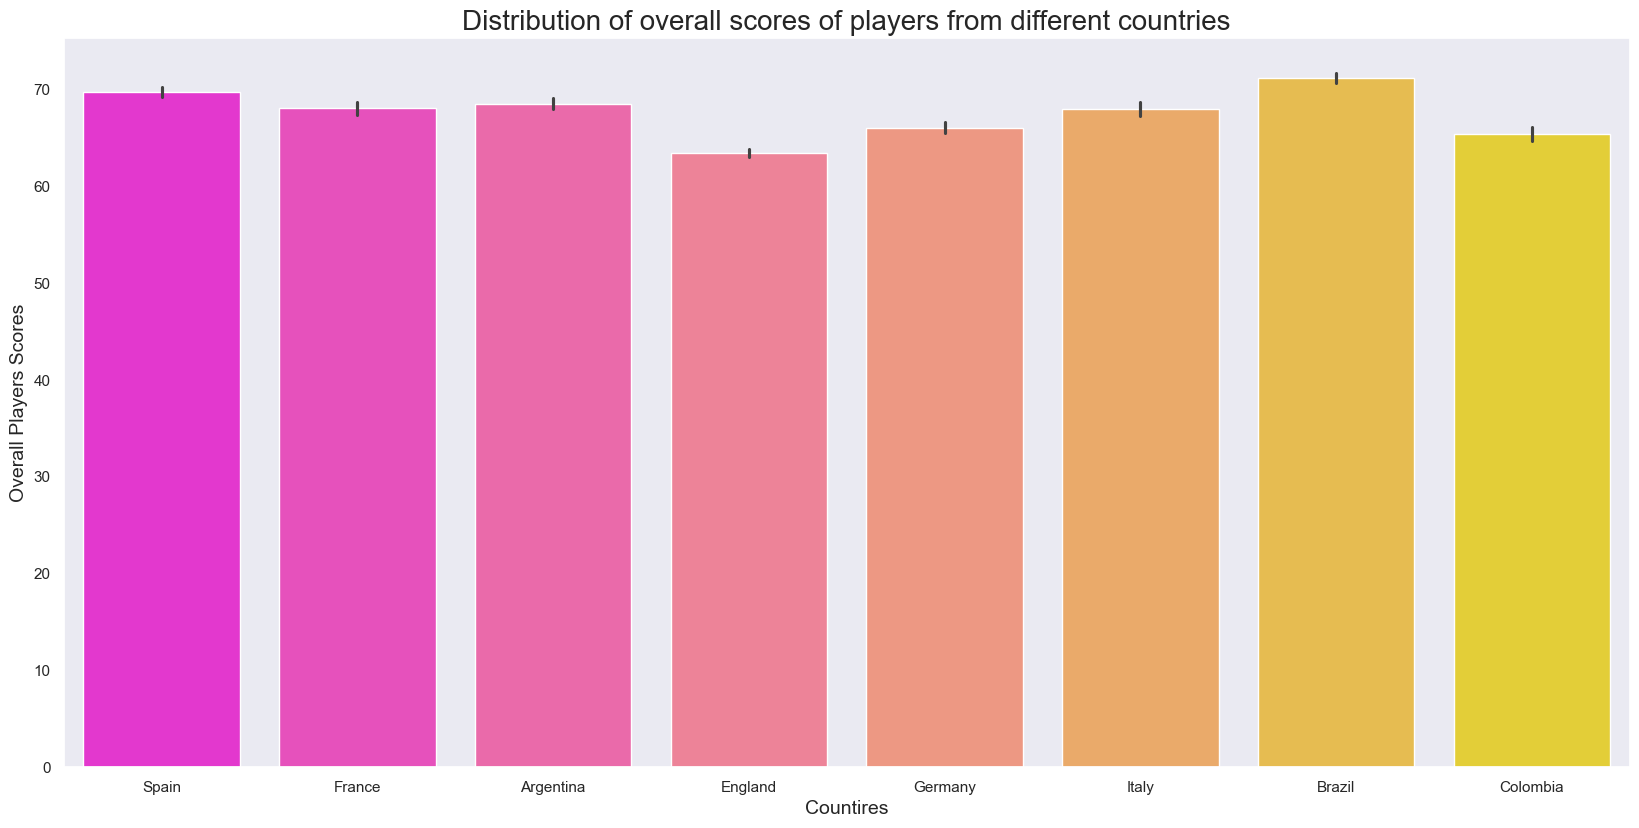

In [2113]:
# Every Nations' Player and their overall scores
top_countries1 = ["England" , "Germany" , "Spain" , "Argentina" , "France" , "Brazil" , "Italy" , "Colombia"]
top_overallscores = data.loc[data["Nationality"].isin(top_countries1) & data["Overall"]]

plt.figure(figsize=(18,9))
qx = sns.barplot(x=top_overallscores["Nationality"], y=top_overallscores["Overall"] , palette="spring" ,
           hue = top_overallscores["Nationality"] , legend=False)
qx.set_title("Distribution of overall scores of players from different countries",fontsize=20)
qx.set_xlabel("Countires",fontsize=14)
qx.set_ylabel("Overall Players Scores",fontsize=14)
plt.show()

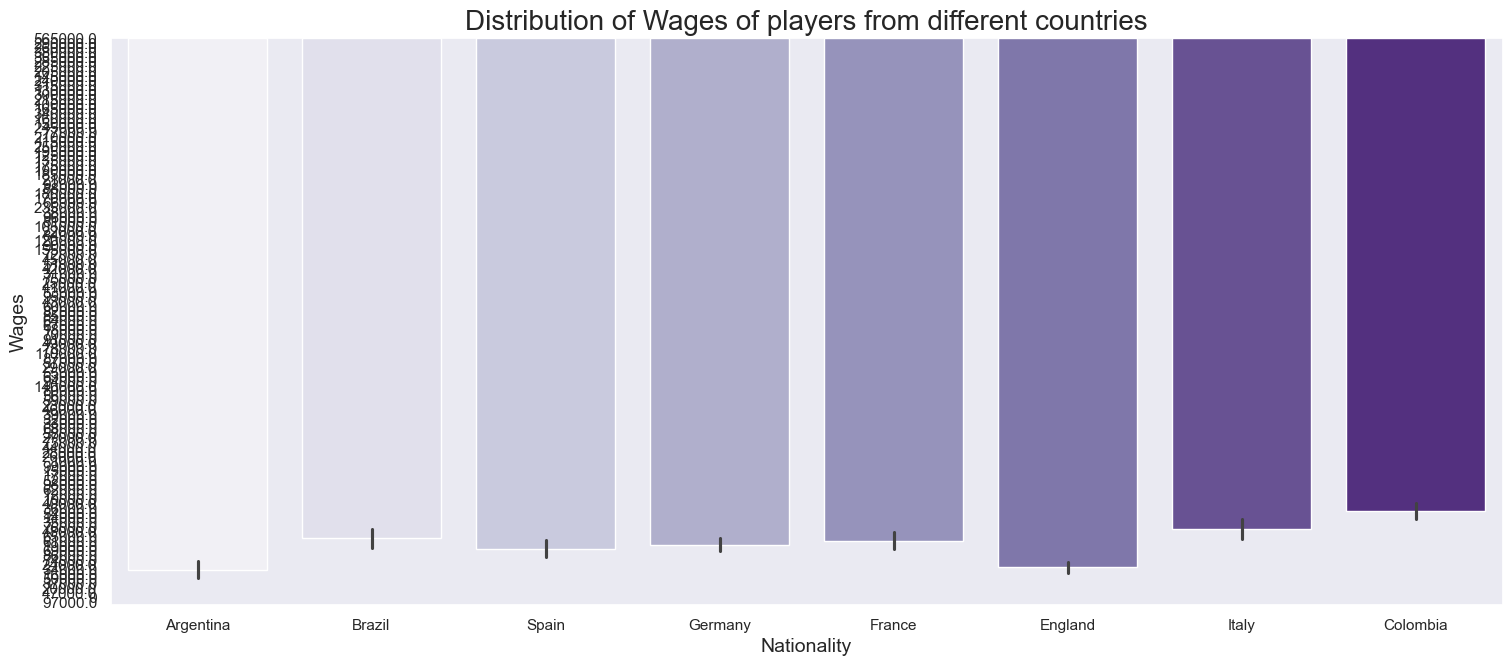

In [2129]:
# Every Nations' Player and their wages

top_wages = data.loc[data["Nationality"].isin(top_countries) & data["Wage"]]

plt.figure(figsize=(16,7))
kx = sns.barplot(x = top_wages["Nationality"] , y = top_wages["Wage"], hue = top_wages["Nationality"] , legend = False , palette="Purples")
kx.set_title(label="Distribution of Wages of players from different countries",fontsize=20)
kx.set_xlabel(xlabel="Nationality",fontsize=14)
kx.set_ylabel(ylabel="Wages",fontsize=14)
plt.show()

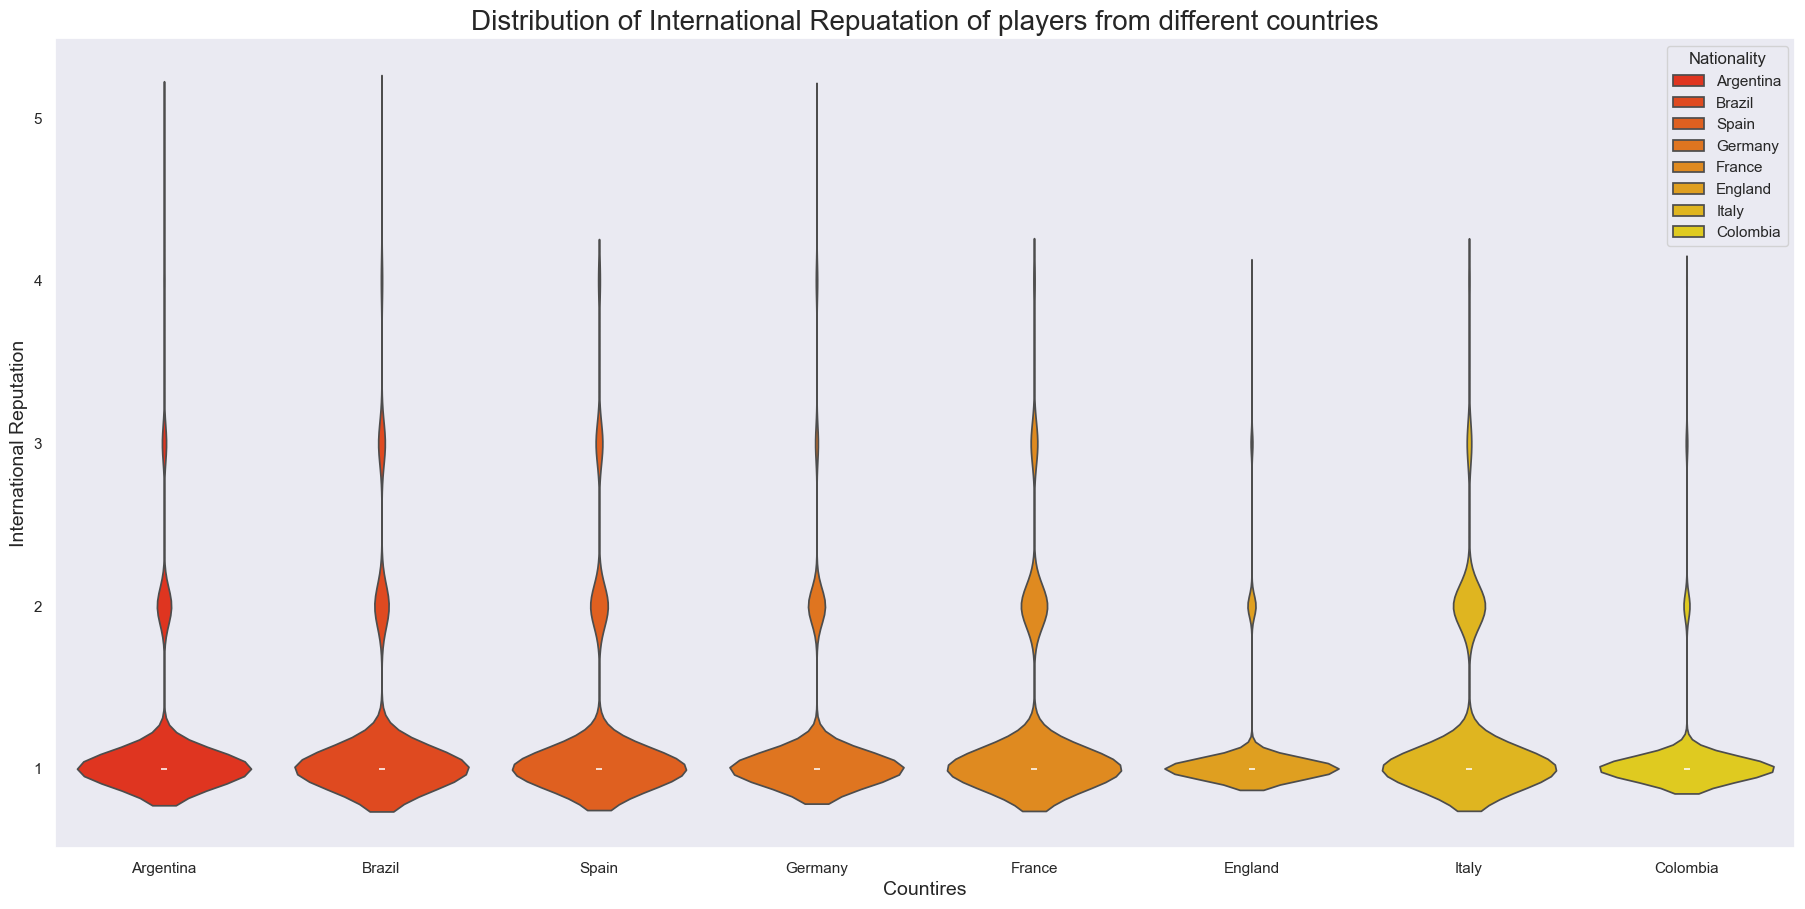

In [2135]:
# Every Nations' Player and their International Reputation
top_reputations = data.loc[data["Nationality"].isin(top_countries) & data["International Reputation"]]

plt.figure(figsize=(20,10))
sns.violinplot(x = top_reputations["Nationality"] , y = top_reputations["International Reputation"] , legend=True,
              hue = top_reputations["Nationality"] , palette = "autumn")
plt.title("Distribution of International Repuatation of players from different countries",fontsize=20)
plt.xlabel("Countires" , fontsize=14)
plt.ylabel("International Reputation",fontsize=14)
plt.show()

In [2137]:
# finding the the popular clubs around the globe
data["Club"].value_counts().head(10)

Club
No Club                    241
FC Barcelona                33
Burnley                     33
AS Monaco                   33
Everton                     33
TSG 1899 Hoffenheim         33
Wolverhampton Wanderers     33
Eintracht Frankfurt         33
Southampton                 33
Valencia CF                 33
Name: count, dtype: int64

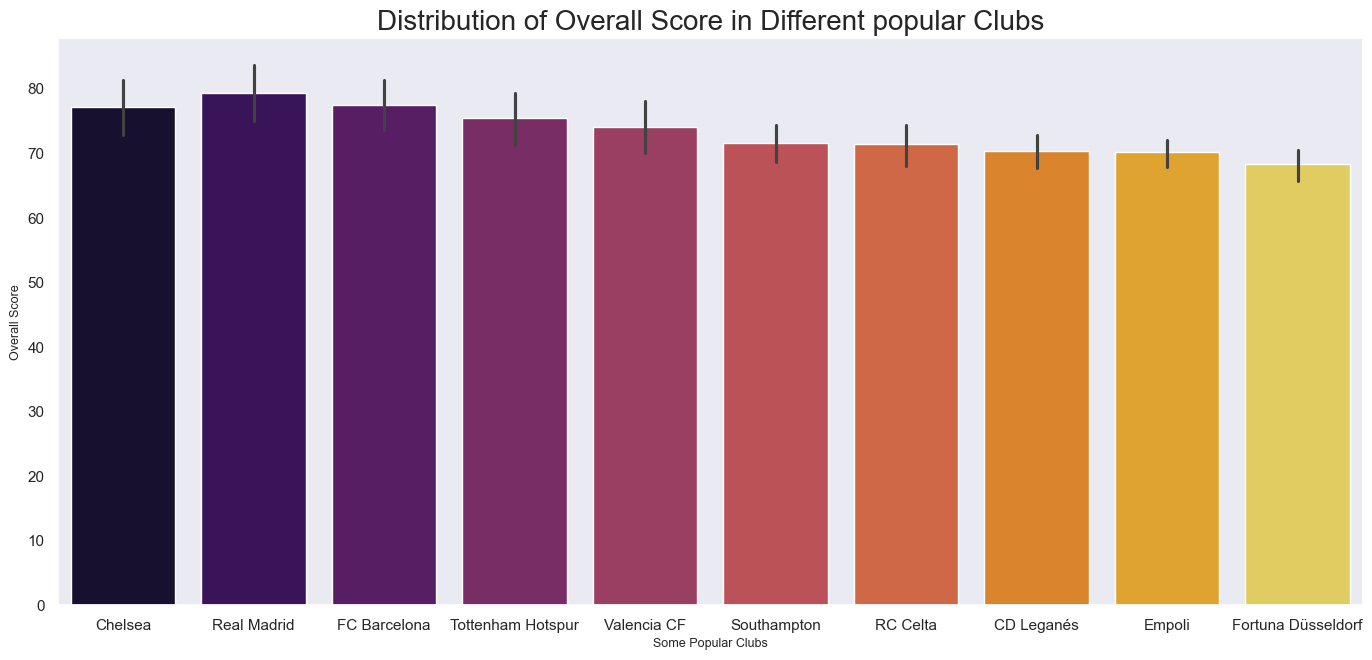

In [2139]:
# Every clubs' Player and their Overall score
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

clubs_overall = data.loc[data["Club"].isin(some_clubs) & data["Overall"]]

plt.figure(figsize=(15,7))
wx = sns.barplot(x = clubs_overall["Club"] , y = clubs_overall["Overall"] , hue = clubs_overall["Club"] , legend = False, palette="inferno")
wx.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
wx.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
wx.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.show()

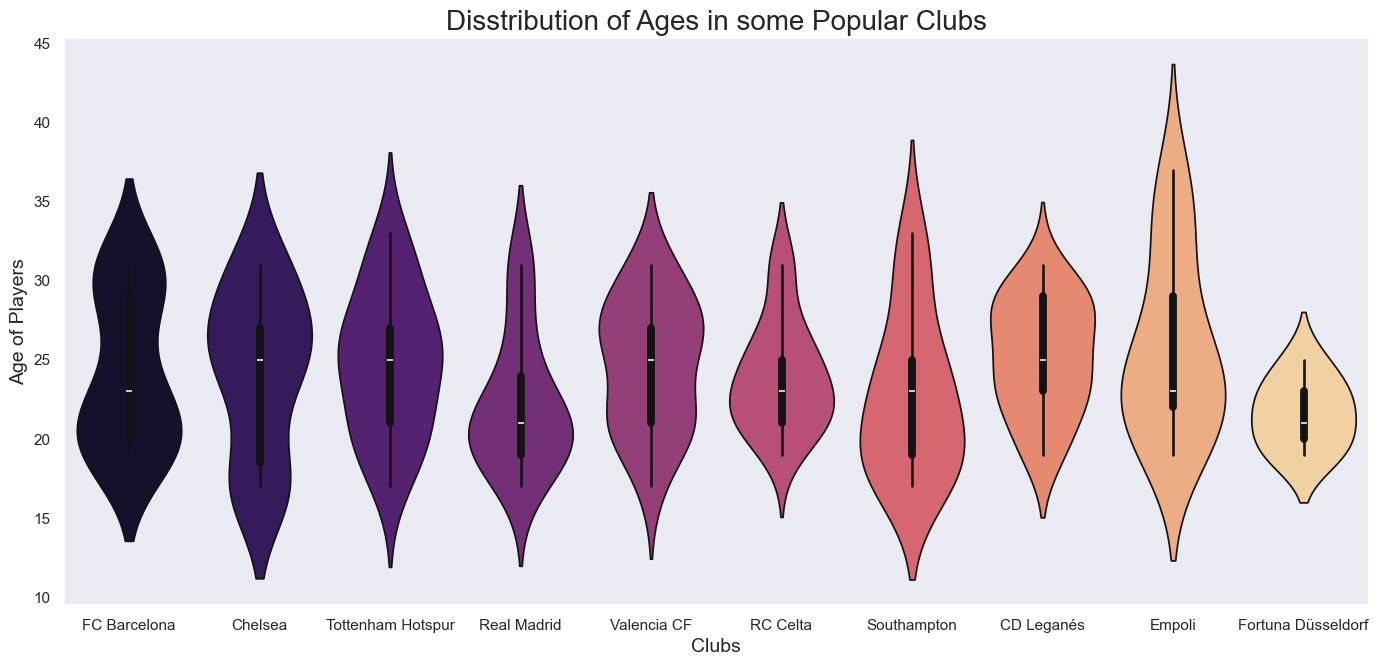

In [2141]:
# Distribution of Ages in some Popular clubs
club_age = data.loc[data["Club"].isin(some_clubs) & data["Age"]]

plt.figure(figsize=(15,7))
rx = sns.violinplot(x = club_age["Club"] , y = club_age["Age"] , hue = club_age["Club"] , legend=False , palette = "magma")
rx.set_title(label="Disstribution of Ages in some Popular Clubs",fontsize=20)
rx.set_xlabel(xlabel="Clubs",fontsize=14)
rx.set_ylabel(ylabel="Age of Players",fontsize=14)
plt.show()

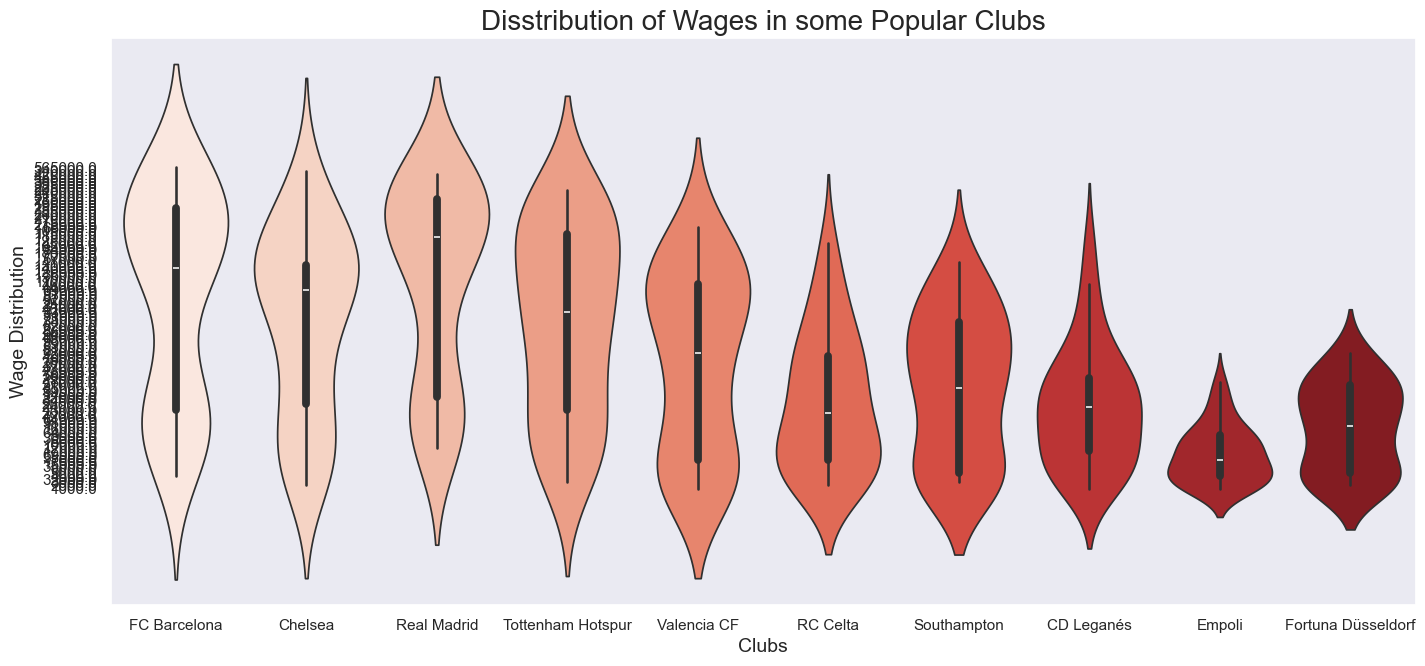

In [2149]:
# Distribution of Wages in some Popular clubs
clubs_wages = data.loc[data["Club"].isin(some_clubs) & data["Wage"]]

plt.figure(figsize=(15,7))
yx = sns.violinplot(x = clubs_wages["Club"] , y = clubs_wages["Wage"] , hue = clubs_wages["Club"] , legend=False, palette="Reds")
yx.set_title(label="Disstribution of Wages in some Popular Clubs",fontsize=20)
yx.set_xlabel(xlabel="Clubs",fontsize=14)
yx.set_ylabel(ylabel="Wage Distribution",fontsize=14)
plt.show()

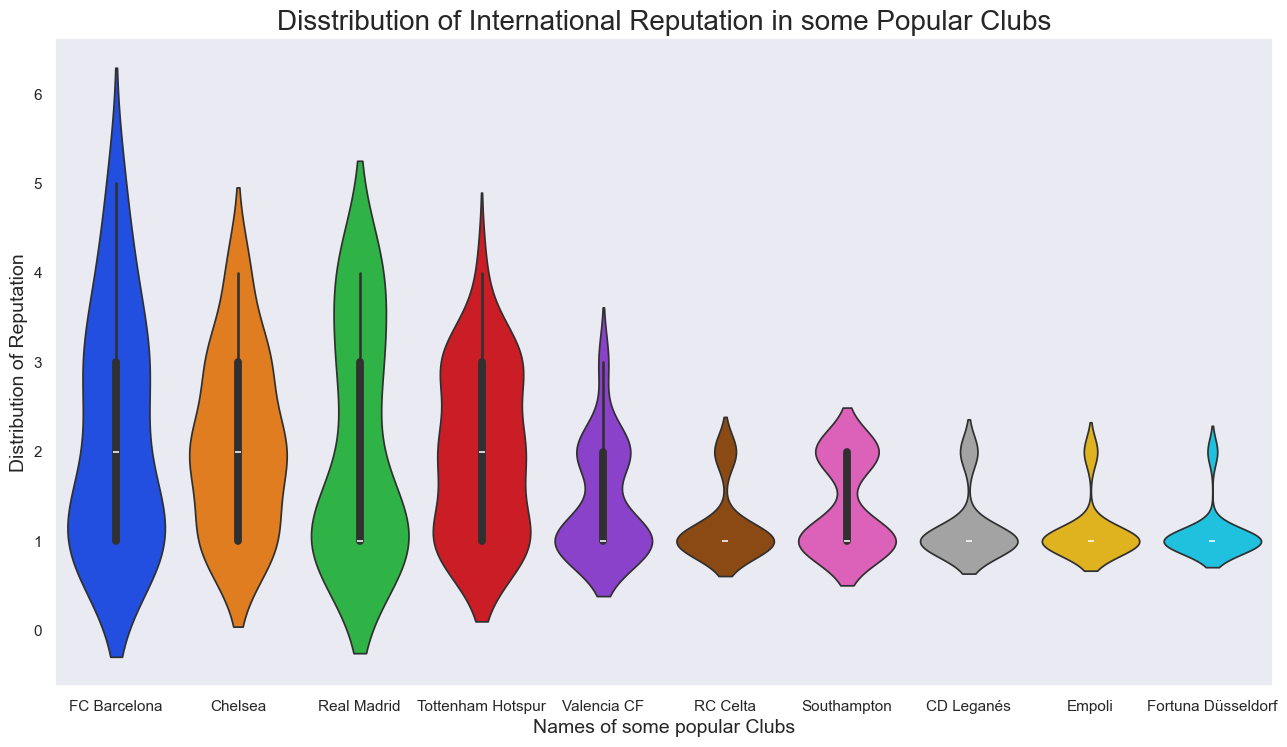

In [2157]:
# Distribution of International Reputation in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

data_club = data.loc[data['Club'].isin(some_clubs) & data['International Reputation']]
plt.figure(figsize= (14, 8))
ax = sns.violinplot(x = 'Club', y = 'International Reputation', hue = "Club" , legend = False , data = data_club, palette = 'bright')
ax.set_xlabel(xlabel = 'Names of some popular Clubs', fontsize = 14)
ax.set_ylabel(ylabel = 'Distribution of Reputation', fontsize = 14)
ax.set_title(label = 'Disstribution of International Reputation in some Popular Clubs', fontsize = 20)
plt.show()

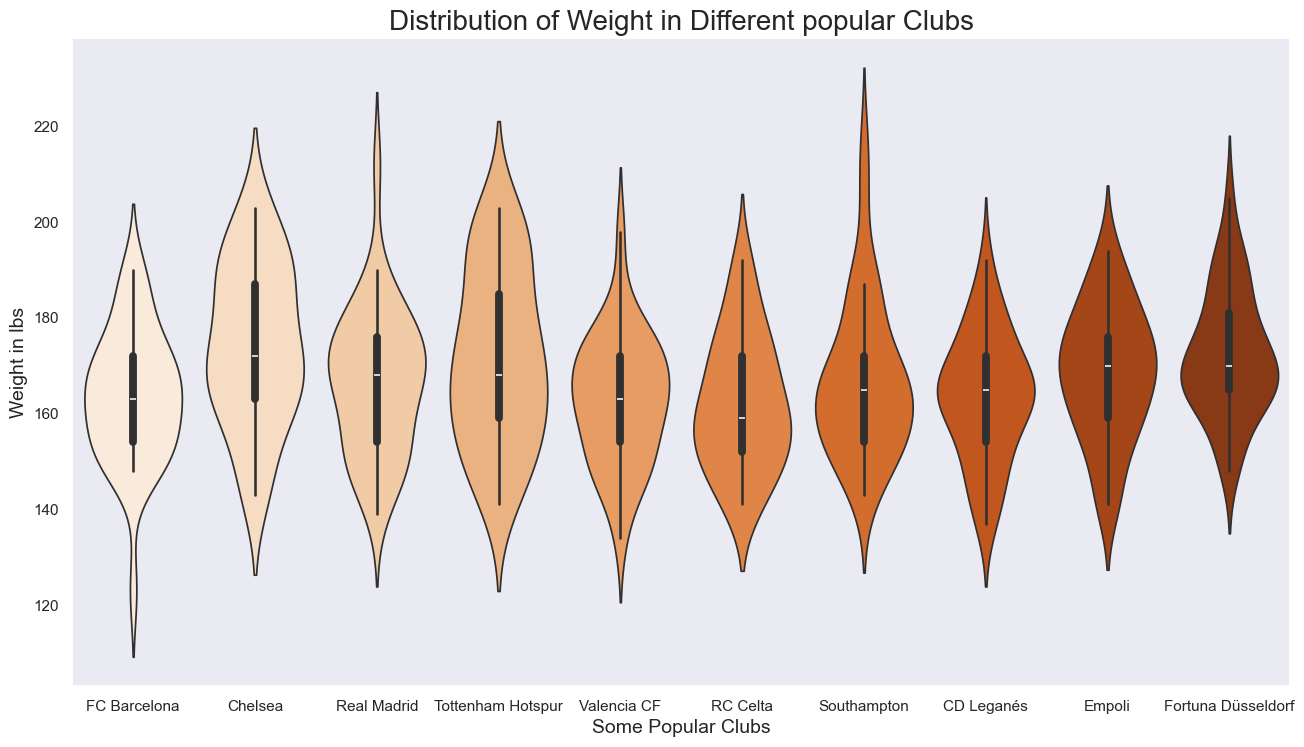

In [2161]:
# Distribution of Weights in some Popular clubs
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid')

clubs_Weights = data.loc[data['Club'].isin(some_clubs) & data['Weight']]

plt.figure(figsize= (14, 8))
jx = sns.violinplot(x = 'Club', y = 'Weight', data = clubs_Weights, hue = "Club" , legend = False , palette = 'Oranges')
jx.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 14)
jx.set_ylabel(ylabel = 'Weight in lbs', fontsize = 14)
jx.set_title(label = 'Distribution of Weight in Different popular Clubs', fontsize = 20)
plt.show()

In [2189]:
# finding 15 youngest Players from the dataset
#data["Age"].head(15)
young = data.sort_values("Age" , ascending = True)[["Name" , "Age" , "Club" , "Nationality"]].head(15)
print(young)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

In [2193]:
# finding 15 eldest players from the dataset

eldest_players = data.sort_values(["Age"] , ascending=False)[["Name" , "Age" , "Club" , "Nationality"]].head(15)
print(eldest_players)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

In [2195]:
# checking the head of the joined column
data["Joined"].head()

0     Jul 1, 2004
1    Jul 10, 2018
2     Aug 3, 2017
3     Jul 1, 2011
4    Aug 30, 2015
Name: Joined, dtype: object

In [2227]:
# The longest membership in the club
import datetime

now = datetime.datetime.now()
print(now)

data["Join_Year"] = data["Joined"].dropna().map(lambda x : x.split(",")[1].split(" ")[1])
print(data["Join_Year"].head())

data["Years_of_Member"] = data["Join_Year"].dropna().map(lambda k : now.year - int(k)).astype(int)
print(data["Years_of_Member"].head())

membership = data[["Name" , "Club" , "Years_of_Member"]].sort_values(by = "Years_of_Member" , ascending=False)
membership.set_index("Name" , inplace=True)
print(membership.head())

2025-02-06 13:42:46.794421
0    2004
1    2018
2    2017
3    2011
4    2015
Name: Join_Year, dtype: object
0    21
1     7
2     8
3    14
4    10
Name: Years_of_Member, dtype: int32
                           Club  Years_of_Member
Name                                            
O. Pérez                Pachuca               34
M. Al Shalhoub         Al Hilal               27
H. Sogahata     Kashima Antlers               27
M. Ogasawara    Kashima Antlers               27
S. Narazaki      Nagoya Grampus               26


In [2251]:
# defining the features of players
player_features = ['Acceleration', 'Aggression', 'Agility', 
                   'Balance', 'BallControl', 'Composure', 
                   'Crossing', 'Dribbling', 'FKAccuracy', 
                   'Finishing', 'GKDiving', 'GKHandling', 
                   'GKKicking', 'GKPositioning', 'GKReflexes', 
                   'HeadingAccuracy', 'Interceptions', 'Jumping', 
                   'LongPassing', 'LongShots', 'Marking', 'Penalties']

# Top four features for every position in football

for i,val in data.groupby(data["Position"])[player_features].mean().iterrows():
    print("Position {} : {}, {}, {}, {}".format(i,*tuple(val.nlargest(4).index)))

Position CAM : Balance, Agility, Acceleration, BallControl
Position CB : Jumping, Aggression, HeadingAccuracy, Marking
Position CDM : Aggression, Jumping, Balance, BallControl
Position CF : Agility, Balance, Acceleration, Dribbling
Position CM : Balance, Agility, Acceleration, BallControl
Position GK : GKReflexes, GKDiving, GKPositioning, GKHandling
Position LAM : Agility, Balance, Acceleration, Dribbling
Position LB : Acceleration, Balance, Agility, Jumping
Position LCB : Jumping, Aggression, HeadingAccuracy, Marking
Position LCM : Balance, Agility, BallControl, LongPassing
Position LDM : Aggression, BallControl, LongPassing, Balance
Position LF : Balance, Agility, Acceleration, Dribbling
Position LM : Acceleration, Agility, Balance, Dribbling
Position LS : Acceleration, Agility, Finishing, Jumping
Position LW : Acceleration, Agility, Balance, Dribbling
Position LWB : Acceleration, Agility, Balance, Jumping
Position RAM : Agility, Balance, Acceleration, Dribbling
Position RB : Acceler

dict_keys(['Balance', 'Agility', 'Acceleration', 'BallControl', 'Dribbling'])
[73.24843423799582, 72.63778705636743, 70.68058455114823, 68.47912317327766, 68.10960334029228, 73.24843423799582]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
dict_keys(['Jumping', 'Aggression', 'HeadingAccuracy', 'Marking', 'Interceptions'])
[69.26884139482564, 64.82283464566929, 63.93138357705287, 63.313835770528684, 62.82789651293588, 69.26884139482564]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
dict_keys(['Aggression', 'Jumping', 'Balance', 'BallControl', 'Interceptions'])
[68.57700421940929, 66.28375527426161, 65.69725738396625, 64.59810126582279, 64.55379746835443, 68.57700421940929]
[0.0, 1.2566370614359172, 2.5132741228718345, 3.7699111843077517, 5.026548245743669, 0.0]
dict_keys(['Agility', 'Balance', 'Acceleration', 'Dribbling', 'BallControl'])
[74.60810810810811, 73.75675675675676, 73.32432432432432, 68.675

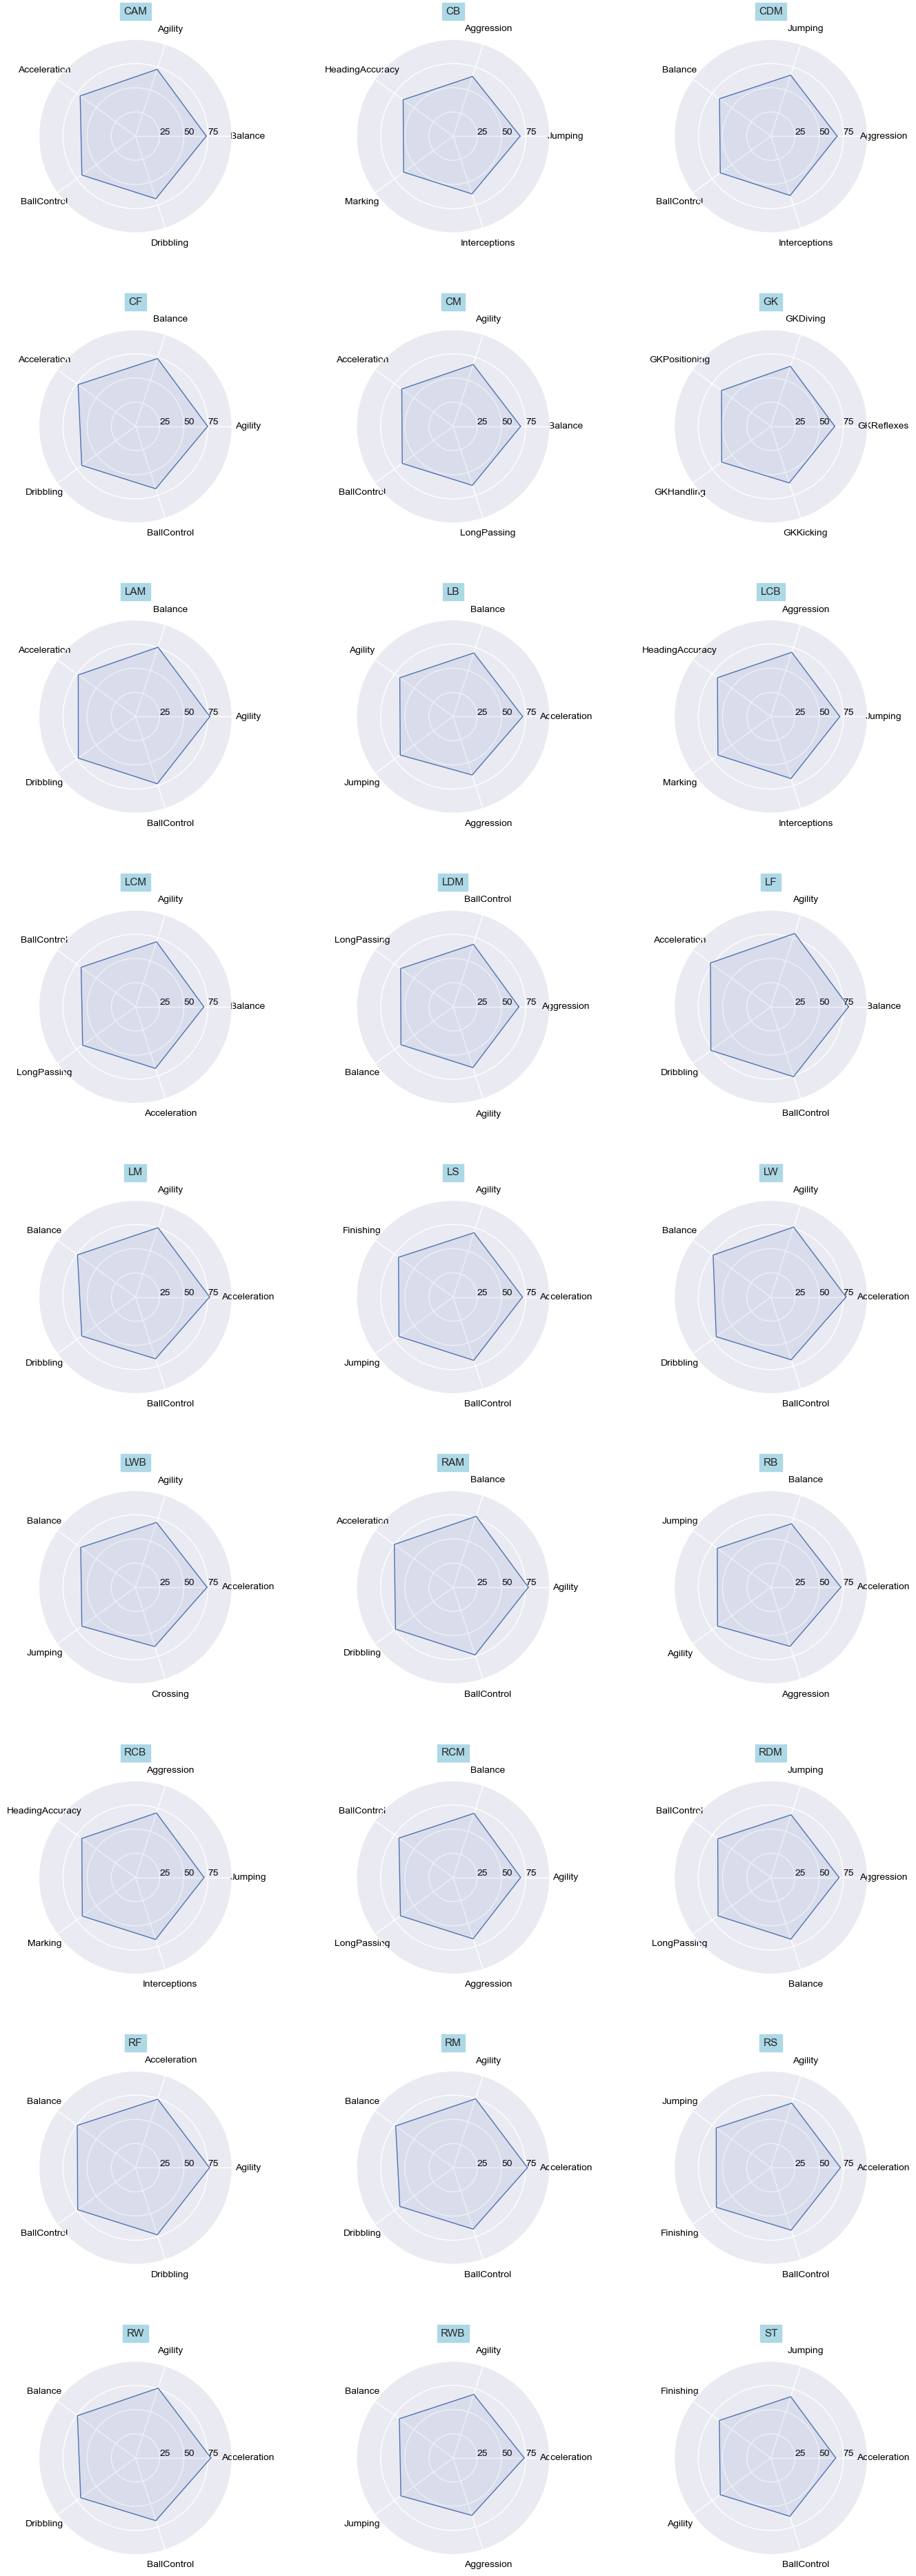

In [2313]:
from math import pi

idx = 1
plt.figure(figsize=(15,45))
for position_name,features in data.groupby(data["Position"])[player_features].mean().iterrows():
    top_features = dict(features.nlargest(5))
    #print(top_features)
    
    #number of variable
    categories = top_features.keys()
    N = len(categories)
    print(categories)
    #print(N)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values = list(top_features.values())
    values += values[:1]
    print(values)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n/float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    print(angles)

    # Initialise the spider plot
    bx = plt.subplot(9, 3, idx, polar=True)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1] , categories , color="black" , size=10)

    # draw ylabels
    bx.set_rlabel_position(0)
    plt.yticks([25,50,75],["25","50","75"], color="black" , size=10)
    plt.ylim(0,100)

    plt.subplots_adjust(hspace=0.5)

    bx.plot(angles , values , linewidth=1 , linestyle="solid" )

    bx.fill(angles , values , "b" , alpha=0.1)

    plt.title(position_name,size=11 , y=1.1 , backgroundcolor='lightblue')

    idx+=1
    
    

In [2327]:
# Top 10 left footed footballers
data[data["Preferred Foot"] == "Left"][["Name" , "Preferred Foot" , "Age", "Club", "Nationality"]].head(10)

Name Preferred Foot  Age               Club Nationality
0       L. Messi           Left   31       FC Barcelona   Argentina
13   David Silva           Left   32    Manchester City       Spain
15     P. Dybala           Left   24           Juventus   Argentina
17  A. Griezmann           Left   27    Atlético Madrid      France
19   T. Courtois           Left   26        Real Madrid     Belgium
24  G. Chiellini           Left   33           Juventus       Italy
26      M. Salah           Left   26          Liverpool       Egypt
28  J. Rodríguez           Left   26  FC Bayern München    Colombia
35       Marcelo           Left   30        Real Madrid      Brazil
36       G. Bale           Left   28        Real Madrid       Wales

In [2329]:
# Top 10 right footed footballers
data[data["Preferred Foot"]=="Right"][["Name" , "Age" , "Preferred Foot" , "Club" , "Nationality"]].head(10)

Name  Age Preferred Foot                 Club Nationality
1   Cristiano Ronaldo   33          Right             Juventus    Portugal
2           Neymar Jr   26          Right  Paris Saint-Germain      Brazil
3              De Gea   27          Right    Manchester United       Spain
4        K. De Bruyne   27          Right      Manchester City     Belgium
5           E. Hazard   27          Right              Chelsea     Belgium
6           L. Modrić   32          Right          Real Madrid     Croatia
7           L. Suárez   31          Right         FC Barcelona     Uruguay
8        Sergio Ramos   32          Right          Real Madrid       Spain
9            J. Oblak   25          Right      Atlético Madrid    Slovenia
10     R. Lewandowski   29          Right    FC Bayern München      Poland

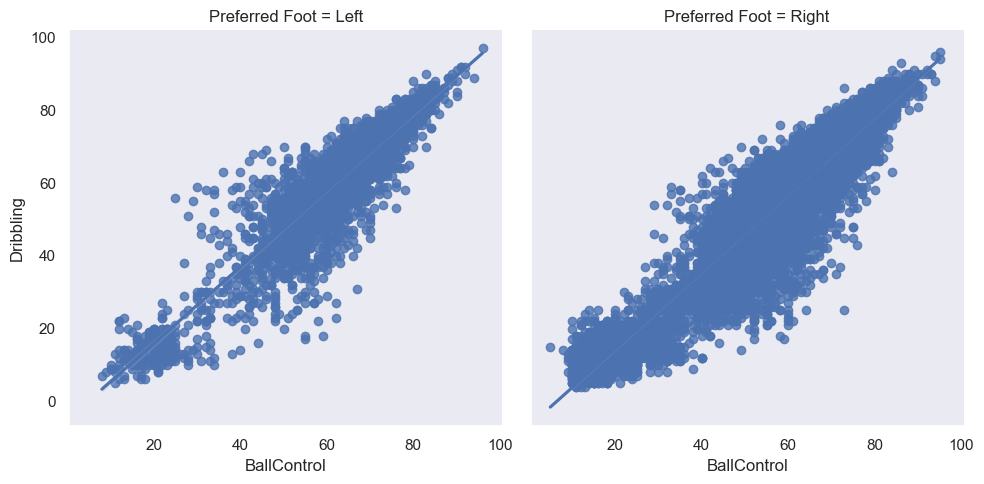

In [2331]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x="BallControl", y="Dribbling", data=data, col="Preferred Foot")

In [2351]:
# visualizing clubs with highest number of different countries
data.groupby(data["Club"])["Nationality"].nunique().sort_values(ascending= False).head(10)

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
West Ham United           18
Empoli                    18
AS Monaco                 18
Eintracht Frankfurt       18
Lazio                     18
Napoli                    18
Name: Nationality, dtype: int64

In [2355]:
# visualizing clubs with lowest number of different countries
data.groupby(data["Club"])["Nationality"].nunique().sort_values(ascending=True).head(10)

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64